# Pendahuluan

Dataset berisi data tentang penjualan yang dilakukan oleh pengecer atau retailer bahan bangunan "Home World" di Amerika Serikat. Semua pelanggannya memiliki kartu keanggotaan. Sebagai catatan, para pelanggan dapat menjadi anggota program loyalitas toko dengan biaya $20 per bulan. Program ini mencakup pemberian diskon, informasi tentang penawaran spesial, dan sejumlah hadiah.

Periode dataset dimulai dari tanggal 2016-12-01 sampai 2017-02-28.


# Inisialisasi

In [1]:
# Memuat library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [2]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Lebar kolom max
pd.set_option('display.max_colwidth', None)

# Memuat Data

In [3]:
try :
    product_codes = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 13\File\product_codes_us.csv',
                               sep=';')
    retail_dataset = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 13\File\retail_dataset_us.csv')

except :
    product_codes = pd.read_csv('/datasets/product_codes_us.csv')
    retail_dataset = pd.read_csv('/datasets/retail_dataset_us.csv')

# Memeriksa dan Memperbaiki Data

In [4]:
# Membuat fungsi informasi umum, cek duplikat dan nilai yang hilang
def check(file) :
    dup = file.duplicated().sum()
    na = file.isna().sum()
    print('Jumlah baris dan kolom ', file.shape)
    print()
    if dup > 0 :
        print('Terdapat duplikat eksplisit dalam data sebanyak', dup,'baris.')
    else :
        print('Tidak terdapat duplikat eksplisit dalam data.')
    print()
    if na.sum() > 0 :
        print('Terdapat nilai yang hilang pada kolom :')
        print(na)
    else :
        print('Tidak terdapat nilai yang hilang dalam data.')

Membuat fungsi untuk memeriksa data karena akan dilakukan berulang.

## Memeriksa Data

### product_codes

In [5]:
check(product_codes)

Jumlah baris dan kolom  (3159, 2)

Tidak terdapat duplikat eksplisit dalam data.

Tidak terdapat nilai yang hilang dalam data.


In [6]:
# Sample data
product_codes.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


Tampaknya product_codes berisi informasi nomor id dan harga produk.

In [7]:
# Deskripsi umum data
product_codes.describe()

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


Tampaknya terdapat produk dengan harga 0.

In [8]:
# Cek jumlah productid dengan harga 0
zero_price = len(product_codes.query('price_per_one == 0'))

print('Terdapat', zero_price, 'produk dengan harga 0.')
print()
print('Sekitar', round(zero_price/len(product_codes)*100,2),'% baris data.')

Terdapat 382 produk dengan harga 0.

Sekitar 12.09 % baris data.


Produk ini merupakan bundle yang diberikan gratis kepada pelanggan. Terdapat sebanyak 382 produk.

In [9]:
# Info data
product_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


**Informasi yang terdapat pada file product_price**

Jumlah baris dan kolom  (3159, 2)

Tidak terdapat duplikat eksplisit dan nilai yang hilang dalam data.

Terdapat sebanyak 382 produk dengan harga 0 yang merupakan bundle. Produk ini diberikan gratis kepada pelanggan.

Informasi yang terdapat pada kolomnya :

 1. `productID`, nomor id produk.
 2. `price_per_one`, harga produk per pcs.


**Masalah yang terdapat pada file product_price :**

 1. Penulisan nama kolom tidak snake_case.



### retail_dataset

In [10]:
check(retail_dataset)

Jumlah baris dan kolom  (105335, 7)

Terdapat duplikat eksplisit dalam data sebanyak 1033 baris.

Terdapat nilai yang hilang pada kolom :
purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64


In [11]:
# Cek data CustomerID yang hilang
retail_dataset[retail_dataset['CustomerID'].isna()].value_counts('loyalty_program')

loyalty_program
0    36210
Name: count, dtype: int64

Terdapat 36.210 baris transaksi tanpa `CustomerID` dan semua pelanggan ini tidak mengikuti program loyalitas. Kemungkinan terdapat error dalam data sehingga ID pelanggan tidak tercatat dalam transaksi ini, namun seharusnya semua transaksi ini merupakan transaksi penjualan ke pelanggan anggota.

In [12]:
# Deskripsi umum data
retail_dataset.describe(include='all')

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
count,105335,105335,105335.000000,105335,69125.000000,105335.000000,105335
unique,4894,3159,NaN,4430,NaN,NaN,31
top,537434,85123A,NaN,2016-12-06 16:57:00,NaN,NaN,Shop 0
freq,675,565,NaN,675,NaN,NaN,38389
mean,NaN,NaN,7.821218,NaN,21019.302047,0.226345,NaN
std,NaN,NaN,327.946695,NaN,1765.444679,0.418467,NaN
min,NaN,NaN,-74216.000000,NaN,18025.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,19544.000000,0.000000,NaN
50%,NaN,NaN,2.000000,NaN,20990.000000,0.000000,NaN
75%,NaN,NaN,7.000000,NaN,22659.000000,0.000000,NaN


Tampaknya terdapat transaksi penjualan dengan `Quantity` negatif dan 0.

Selain hal tersebut terdapat 31 gerai, 4.894 nomor transaksi dan 3.159 jenis produk terjual.

In [13]:
# Jumlah baris qty sales negatif
neg_qty = retail_dataset.query('Quantity < 0')['Quantity'].count()

print('Jumlah baris dengan quantity negatif', neg_qty, 'baris.', round(neg_qty / len(retail_dataset)*100,2), 
      '% dari baris data.')

Jumlah baris dengan quantity negatif 2118 baris. 2.01 % dari baris data.


In [14]:
# Total qty sales negatif
retail_dataset.query('Quantity < 0')['Quantity'].sum()

-119662

Terdapat 2.118 baris data dengan qty penjualan negatif. 2,01% dari total baris data.

Total qty penjualan negatif -119.662 pcs.

Transaksi ini merupakan pembatalan penjualan yang tidak dilakukan didalam satu nomor `purchaseid` sehingga menghasilkan qty negatif.

In [15]:
# Jumlah baris qty sales 0
zero_qty = retail_dataset.query('Quantity == 0')['Quantity'].count()

print('Jumlah baris dengan quantity 0', zero_qty, 'baris.', round(zero_qty / len(retail_dataset)*100,2), 
      '% dari baris data.')

Jumlah baris dengan quantity 0 33055 baris. 31.38 % dari baris data.


Terdapat 33.055 baris data dengan qty penjualan 0. 31,38% dari total baris data.

Tampaknya transaksi ini merupakan pembatalan penjualan yang terjadi di dalam satu nomor `purchaseid`.


In [16]:
# Sample data
retail_dataset.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


File berisi informasi tentang transaksi penjualan harian gerai.

In [17]:
retail_dataset.agg({'purchasedate':['min', 'max']})

,purchasedate
min,2016-12-01 08:26:00
max,2017-02-28 17:04:00


Periode data dimulai dari tanggal 2016-12-01 sampai 2017-02-28.

In [18]:
# Info data
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


**Informasi yang terdapat pada file retail_dataset**

Jumlah baris dan kolom  (105335, 7)

Periode data dimulai dari tanggal 2016-12-01 sampai 2017-02-28.

Terdapat 2.118 baris data dengan qty penjualan negatif. 2,01% dari total baris data. Dengan total qty penjualan negatif -119.662 pcs.

Transaksi ini merupakan pembatalan penjualan yang tidak dilakukan didalam satu nomor `purchaseid` sehingga menghasilkan qty negatif.

Selain hal tersebut terdapat 31 gerai, 4.894 nomor transaksi dan 3.159 jenis produk terjual.

Informasi yang terdapat pada kolomnya :

 1. `purchaseId`, nomor id transaksi penjualan.
 2. `item_ID`, nomor id produk.
 3. `purchasedate`, tanggal transaksi.
 4. `Quantity`, jumlah barang.
 5. `CustomerID`, nomor id pelanggan.
 6. `ShopID`, nomor id gerai.
 7. `loyalty_program`, apakah pelanggan adalah anggota program loyalitas. 0 = tidak, 1 = ya.

**Masalah yang terdapat pada file retail_dataset :**

 1. Penulisan nama kolom tidak snake_case.
 2. Format kolom `purchasedate` object.
 3. Terdapat duplikat eksplisit sebanyak 1.033 baris.
 4. Terdapat nilai yang hilang pada kolom `CustomerID` sebanyak 36.210 baris.
 5. Terdapat transaksi penjualan dengan `Quantity` 0 sebanyak 33.055 baris.



## Memperbaiki Data

### product_codes

**Merubah nama kolom menjadi lowercase**

In [19]:
# Rubah nama kolom menjadi lowecase
product_codes.columns = product_codes.columns.str.lower()

# Cek perubahan nama kolom
product_codes.columns

Index(['productid', 'price_per_one'], dtype='object')

Nama kolom sudah berubah menjadi lowercase

### retail_dataset

**Merubah nama kolom menjadi lowercase**

In [20]:
# Rubah nama kolom menjadi lowecase
retail_dataset.columns = retail_dataset.columns.str.lower()

# Cek perubahan nama kolom
retail_dataset.columns

Index(['purchaseid', 'item_id', 'quantity', 'purchasedate', 'customerid',
       'loyalty_program', 'shopid'],
      dtype='object')

Nama kolom sudah berubah menjadi lowercase

**Merubah kolom `purchasedate` menjadi datetime**

In [21]:
# Merubah tipe data ke datetime
retail_dataset['purchasedate'] = pd.to_datetime(retail_dataset['purchasedate'])

# Cek perubahan tipe data
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   customerid       69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   shopid           105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


Kolom `purchasedate` sudah berubah menjadi datetime.

**Menghapus duplikat eksplisit**

In [22]:
# Menghapus data duplikat
retail_dataset = retail_dataset.drop_duplicates()

# Cek apakah masih ada data duplikat
retail_dataset.duplicated().sum()

0

Sudah tidak terdapat duplikat eksplisit.

In [23]:
# Perubahan baris data
print('Jumlah baris data berubah menjadi :', retail_dataset.shape[0], 'baris')

Jumlah baris data berubah menjadi : 104302 baris


**Mengisi nilai yang hilang pada kolom `customerid`**

In [24]:
# Melihat sampel data dengan nilai yang hilang
retail_dataset[retail_dataset['customerid'].isna()].head(10)

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
23,538149,21154,0,2016-12-09 16:27:00,NaN,0,Shop 0
27,539958,84659A,3,2016-12-23 13:26:00,NaN,0,Shop 0
28,539451,22376,0,2016-12-17 16:59:00,NaN,0,Shop 0
30,536920,16235,9,2016-12-03 12:01:00,NaN,0,Shop 0
32,540468,21990,0,2017-01-07 13:55:00,NaN,0,Shop 0


Jika dilihat dari sampel data, nomor `purchaseid` merupakan nilai unik dan setiap nomor `purchaseid` mengacu ke satu nomor `customerid`. Maka untuk mengisi nilai `customerid` yang hilang akan di isi dengan nomor `purchaseid` tiap transaksinya.

In [25]:
# Mengisi nilai null dengan 0
retail_dataset['customerid'] = retail_dataset['customerid'].fillna(0)

# Menyeragamkan format
retail_dataset['customerid'] = retail_dataset['customerid'].astype(int)

# Mengganti customerid nilai 0 dengan purchaseid
retail_dataset['customerid'] = retail_dataset['customerid'].where(retail_dataset['customerid'] !=0, 
                                                                  retail_dataset['purchaseid'])

# Cek nilai null
retail_dataset.isna().sum()

purchaseid         0
item_id            0
quantity           0
purchasedate       0
customerid         0
loyalty_program    0
shopid             0
dtype: int64

Sudah tidak terdapat nilai yang hilang pada data.

In [26]:
# Cek perubahan customer id
retail_dataset.query('purchaseid == "540468"')

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid
6,540468,22189,0,2017-01-07 13:55:00,540468,0,Shop 0
32,540468,21990,0,2017-01-07 13:55:00,540468,0,Shop 0
334,540468,22201,0,2017-01-07 13:55:00,540468,0,Shop 0
379,540468,21632,1,2017-01-07 13:55:00,540468,0,Shop 0
511,540468,84032A,0,2017-01-07 13:55:00,540468,0,Shop 0
...,...,...,...,...,...,...,...
104181,540468,85169B,0,2017-01-07 13:55:00,540468,0,Shop 0
104328,540468,90214A,0,2017-01-07 13:55:00,540468,0,Shop 0
104550,540468,21109,0,2017-01-07 13:55:00,540468,0,Shop 0
104730,540468,22028,0,2017-01-07 13:55:00,540468,0,Shop 0


`customerid` yang hilang sudah berubah menjadi nomor`purchaseid`.

**Menghapus transaksi penjualan dengan nilai `quantity` 0**

In [27]:
# Sampel data dengan qty 0
retail_dataset.query('quantity == 0').head(5)

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805,1,Shop 20
6,540468,22189,0,2017-01-07 13:55:00,540468,0,Shop 0


Tampaknya data merupakan satu baris transaksi dengan `quantity` 0.

In [28]:
# Sampel transaksi purchaseid dengan quantity 0
retail_dataset.query('purchaseid == "543812"')

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28
214,543812,22956,0,2017-02-13 14:40:00,23151,1,Shop 28
1308,543812,22410,3,2017-02-13 14:40:00,23151,1,Shop 28
2250,543812,22720,1,2017-02-13 14:40:00,23151,1,Shop 28
4596,543812,22242,0,2017-02-13 14:40:00,23151,1,Shop 28
...,...,...,...,...,...,...,...
101300,543812,22666,0,2017-02-13 14:40:00,23151,1,Shop 28
101307,543812,84849B,0,2017-02-13 14:40:00,23151,1,Shop 28
101391,543812,22914,0,2017-02-13 14:40:00,23151,1,Shop 28
101485,543812,84978,5,2017-02-13 14:40:00,23151,1,Shop 28


Terdapat beberapa pembatalan pada satu nomor `purchaseid`. Sebenarnya quantity 0 ini tidak berpengaruh pada jumlah penjualan karena dengan mengalikan harga produk dengan quantity 0 akan menghasilkan penjualan 0. Tidak terdapat produk yang terjual dan transaksi ini tidak berkontibusi pada total penjualan. Namun pada penelitian ini transaksi dengan quantity 0 akan dihapus untuk mengurangi baris data dan besaran data. 

In [29]:
# Memfilter data tanpa quantity 0
retail_dataset = retail_dataset[retail_dataset['quantity'] != 0]

# Cek perubahan data
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71940 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       71940 non-null  object        
 1   item_id          71940 non-null  object        
 2   quantity         71940 non-null  int64         
 3   purchasedate     71940 non-null  datetime64[ns]
 4   customerid       71940 non-null  object        
 5   loyalty_program  71940 non-null  int64         
 6   shopid           71940 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 4.4+ MB


Jumlah baris data berubah menjadi 71.940 baris dan besaran data menjadi 4,4 MB.

## Kesimpulan

Periode dataset dimulai dari tanggal 2016-12-01 sampai 2017-02-28.

Terdapat 2 dataset dalam penelitian ini :

1. **product_codes**, dataset berisi informasi mengenai harga produk.
2. **retail_dataset**, dataset berisi informasi mengenai transaksi volume penjualan harian tiap gerai.

Informasi dan perbaikan yang dilakukan pada setiap dataset :

1. **product_codes**
   
   A. **Informasi yang terdapat pada dataset :**

   Jumlah baris dan kolom  (3159, 2)

   Tidak terdapat duplikat eksplisit dan nilai yang hilang dalam data.

   Terdapat sebanyak 382 produk dengan harga 0 yang merupakan bundle. Produk ini diberikan gratis kepada pelanggan.

   Informasi yang terdapat pada kolomnya :

    - `productid`, nomor id produk.
    - `price_per_one`, harga produk per pcs.
    
    B. **Perbaikan pada dataset :**
    
     1. Merubah nama kolom menjadi lowercase.
 


2. **retail_dataset**

   A. **Informasi yang terdapat pada dataset :**

   Jumlah baris dan kolom  (105335, 7)

   Terdapat 2.118 baris data dengan qty penjualan negatif. 2,01% dari total baris data. Dengan total qty penjualan negatif -119.662 pcs.

   Transaksi ini merupakan pembatalan penjualan yang tidak dilakukan didalam satu nomor `purchaseid` sehingga menghasilkan qty negatif.

   Selain hal tersebut terdapat 31 gerai, 4.894 nomor transaksi dan 3.159 jenis produk terjual.

   Informasi yang terdapat pada kolomnya :

   - `purchaseId`, nomor id transaksi penjualan.
   - `item_id`, nomor id produk.
   - `purchasedate`, tanggal transaksi.
   - `quantity`, jumlah barang.
   - `customerid`, nomor id pelanggan.
   - `shopid`, nomor id gerai.
   - `loyalty_program`, apakah pelanggan adalah anggota program loyalitas. 0 = tidak, 1 = ya. 
   
   B. **Perbaikan pada dataset :**
    
    1. Merubah nama kolom menjadi lowercase.
    2. Merubah kolom `purchasedate` menjadi datetime.
    3. Menghapus duplikat eksplisit.
    4. Mengisi nilai yang hilang pada kolom `customerid` dengan nomor `purchaseid`.
    5. Menghapus transaksi penjualan dengan nilai quantity 0.

# Penjualan secara Keseluruhan

## Total Penjualan

Laporan penjualan merinci semua aktivitas penjualan bisnis Anda dan memberikan wawasan tentang apa yang harus dilakukan perusahaan Anda secara berbeda. https://www.businessnewsdaily.com/15988-how-to-write-a-sales-report.html

In [30]:
# Menggabungkan retail_dataset dengan product_codes
df = pd.merge(retail_dataset,
             product_codes,
             left_on='item_id',
             right_on='productid',
             how = 'left')

# Menghapus kolom productid karena dobel dengan item_id
df = df.drop(columns=('productid'))

# Menghitung nilai penjualan
df['sales'] = df['quantity'] * df['price_per_one']

# Menambah informasi bulan dan tahun
df['month_year'] = df['purchasedate'].dt.strftime('%Y-%m')

# Menambah informasi tanggal
df['date'] = df['purchasedate'].dt.strftime('%Y-%m-%d')

# Cek penambahan informasi
df.head()

,purchaseid,item_id,quantity,purchasedate,customerid,loyalty_program,shopid,price_per_one,sales,month_year,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12,2016-12-10
1,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,0.72,5.04,2016-12,2016-12-14
2,541424,79321,1,2017-01-17 17:57:00,541424,0,Shop 0,0.00,0.00,2017-01,2017-01-17
3,537795,82494L,5,2016-12-08 13:03:00,22892,1,Shop 6,2.55,12.75,2016-12,2016-12-08
4,541696,22197,4,2017-01-20 18:08:00,541696,0,Shop 0,0.72,2.88,2017-01,2017-01-20


Dataframe sudah ditambahkan parameter untuk menghitung penjualan.

In [31]:
# Cek kembali apakah terdapat nilai null
df.isna().sum()

purchaseid         0
item_id            0
quantity           0
purchasedate       0
customerid         0
loyalty_program    0
shopid             0
price_per_one      0
sales              0
month_year         0
date               0
dtype: int64

Tidak terdapat nilai yang hilang pada dataframe. Hal ini dilakukan untuk memastikan proses penggabungan data sudah benar atau belum.

In [32]:
# Menghitung penjualan bulanan
monthly_sales = df.groupby('month_year').agg({'sales':'sum'}).reset_index()

monthly_sales

,month_year,sales
0,2016-12,361327.71
1,2017-01,321553.46
2,2017-02,292564.89


Secara keseluruhan penjualan mengalami penurunan.

In [33]:
# Fungsi grafik batang
def bar(title, file, x, y) :
    plt.figure(figsize=(10,5))
    splot = sns.barplot(data=file, x=x, y=y)
    
    # Annotasi grafik
    for g in splot.patches:
        splot.annotate(format(g.get_height(),'.1f'),
                      (g.get_x() + g.get_width() /2, g.get_height()),
                      ha = 'center', va = 'baseline', 
                      xytext = (0,2), rotation=0,
                      textcoords = 'offset points')
        
    # Parameter grafik
    plt.title(title)
    plt.xticks(rotation = 0)
    plt.show()

Membuat fungsi grafik bar karena akan digunakan berulang.

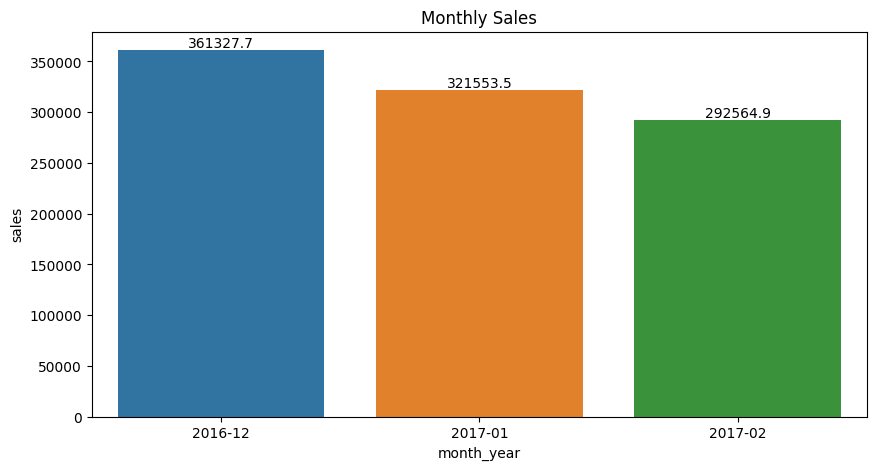

In [34]:
bar('Monthly Sales', monthly_sales, 'month_year', 'sales')

Pada periode Desember 2016 sampai Februari 2017 penjualan terus mengalami penurunan.

In [35]:
# Fungsi grafik garis
def line(title, file, x, y) :
    plt.figure(figsize=(15,8))
    sns.lineplot(file, x=x, y=y)
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.grid(True)

Membuat fungsi grafik garis karena akan digunakan berulang.

Analisis tren adalah teknik yang digunakan untuk memeriksa dan memprediksi pergerakan suatu item berdasarkan data terkini dan historis. Anda dapat menggunakan analisis tren untuk meningkatkan bisnis Anda menggunakan data tren untuk menginformasikan pengambilan keputusan Anda. https://www.business.qld.gov.au/running-business/growing-business/trend-analysis

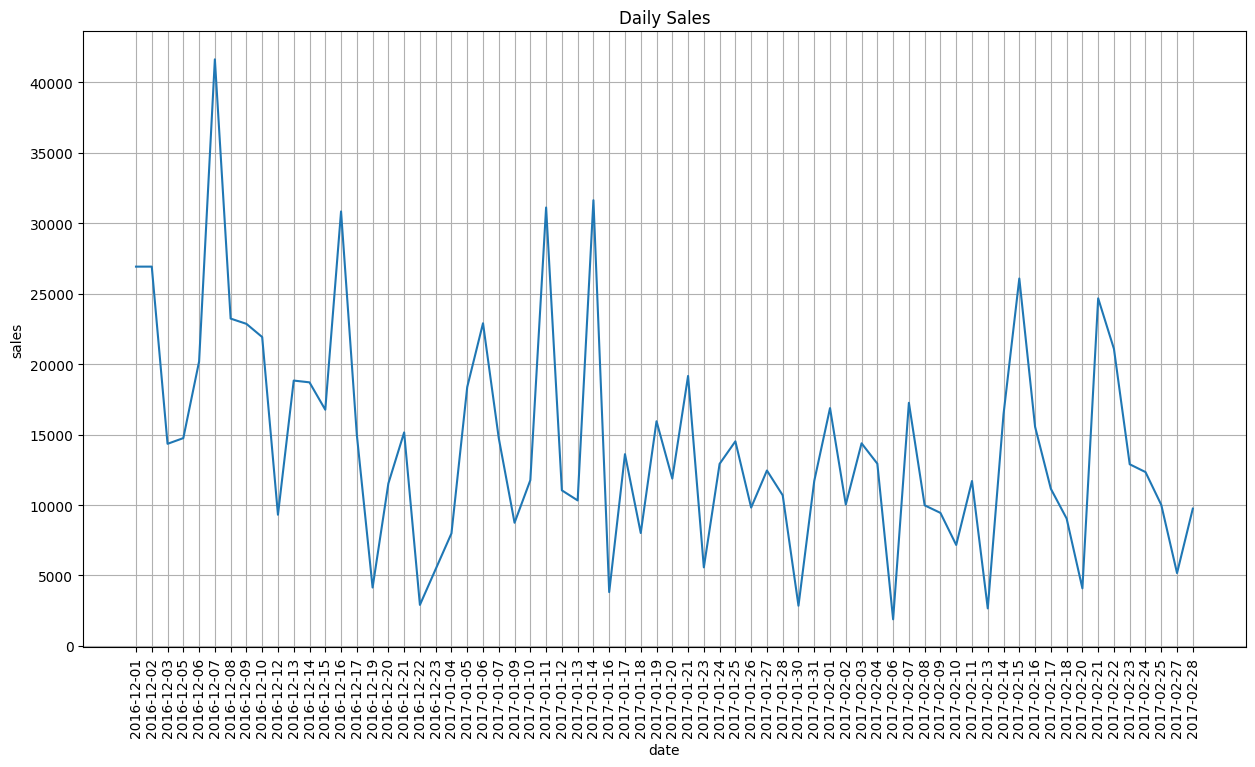

In [36]:
# Melihat penjualan harian
daily_sales = df.groupby('date').agg({'sales':'sum'}).reset_index()

# Grafik line
line('Daily Sales', daily_sales, 'date', 'sales')


Trend penjualan juga menunjukan penurunan dari Desember 2016 sampai Februari 2017.

## Volume Penjualan

Berbeda dengan total penjualan, metrik volume penjualan berfokus pada jumlah produk yang terjual bukan keuntungan moneter. Tampaknya volume penjualan tidak sepenting total penjualan, namun sebenarnya tidak demikian. Volume penjualan merupakan indikator penting kesehatan bisnis. Ini memungkinkan Anda melacak kinerja kampanye pemasaran, mengevaluasi upaya perwakilan penjualan, dan memilih tempat terbaik untuk toko fisik. https://sendpulse.com/support/glossary/sales-volume

In [37]:
# Menghitung volume penjualan bulanan
monthly_sales_volume = df.groupby('month_year').agg({'quantity':'sum'}).reset_index()

monthly_sales_volume

,month_year,quantity
0,2016-12,298889
1,2017-01,273381
2,2017-02,249943


Secara keseluruhan volume penjualan mengalami penurunan.

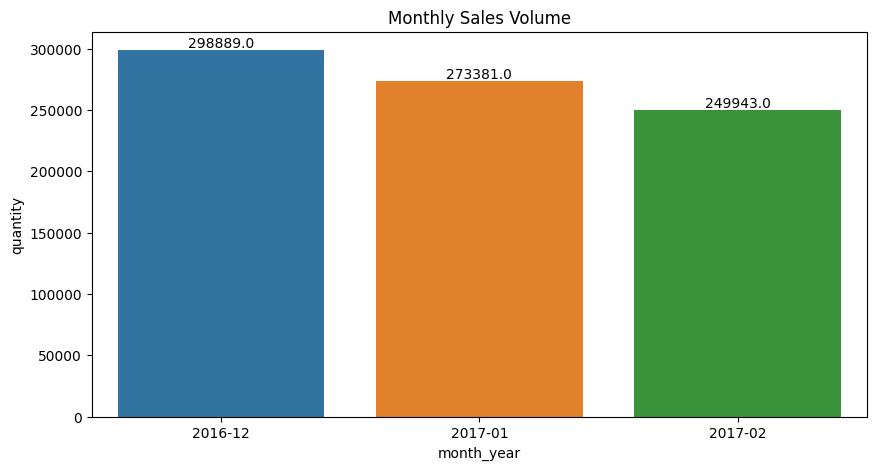

In [38]:
bar('Monthly Sales Volume', monthly_sales_volume, 'month_year', 'quantity')

Pada periode Desember 2016 sampai Februari 2017 volume penjualan terus mengalami penurunan.

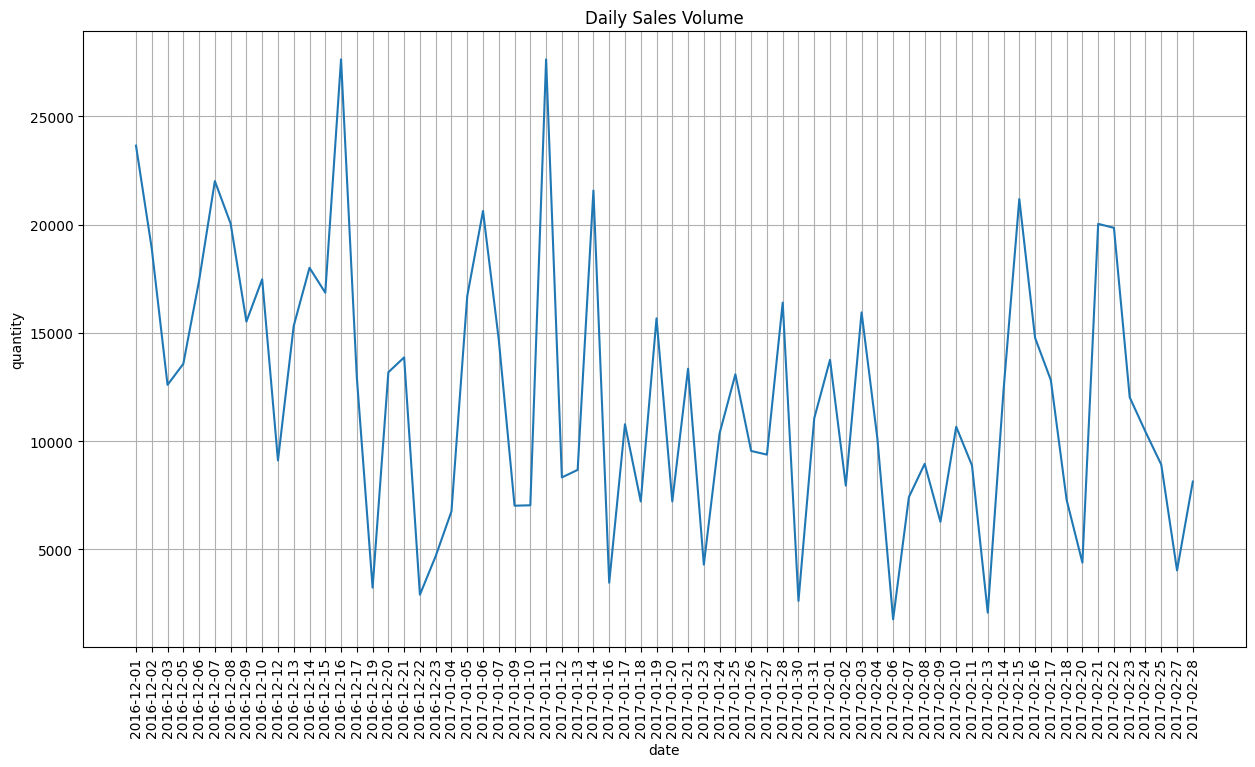

In [39]:
# Melihat volume penjualan harian
daily_sales_volume = df.groupby('date').agg({'quantity':'sum'}).reset_index()

# Grafik garis
line('Daily Sales Volume', daily_sales_volume, 'date', 'quantity')

Trend volume penjualan juga menunjukan penurunan dari Desember 2016 sampai Februari 2017.

## Rata-rata Penjualan

**Rata-rata penjualan bulanan per gerai**

Metrik ini dihitung untuk menetapkan batasan kinerja yang akan dibandingkan dengan penjualan tiap gerai untuk menilai kinerja tiap gerai dari rata-rata penjualan bulanannya.

In [40]:
# Menghitung penjualan bulanan per gerai dan bulan
monthly_shop_sales = df.pivot_table(index=['month_year', 'shopid'],
                                   values = 'sales',
                                   aggfunc = 'sum').reset_index()

# Menghitung rata-rata penjualan bulanan per gerai
avg_monthly_sales_per_shop = monthly_shop_sales.groupby('month_year').agg({'sales':'mean'}).reset_index()

# Parameter rata-rata penjualan bulanan per gerai
avg_monthly_sales_per_shop_param = round(avg_monthly_sales_per_shop['sales'].mean(),2)

print('Rata-rata penjualan bulanan per gerai :', avg_monthly_sales_per_shop_param )

Rata-rata penjualan bulanan per gerai : 10488.67


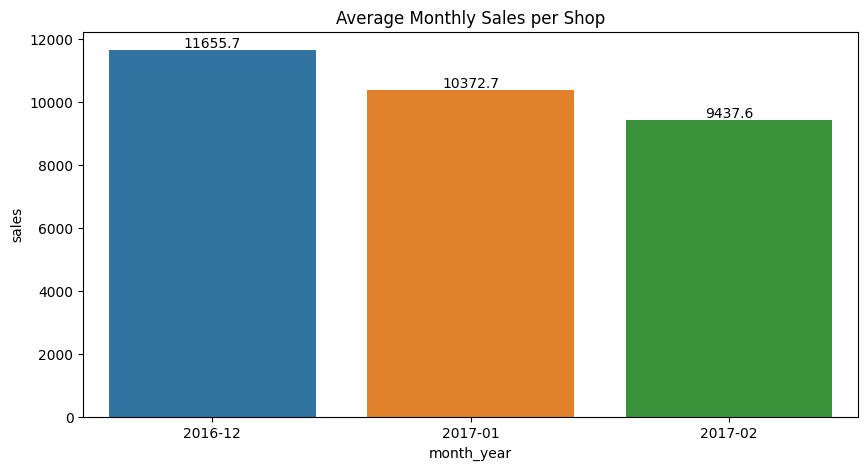

In [41]:
bar('Average Monthly Sales per Shop', avg_monthly_sales_per_shop, 'month_year', 'sales')

Rata-rata penjualan per gerai mengalami penurunan dari Desember 2016 sampai Februari 2017.

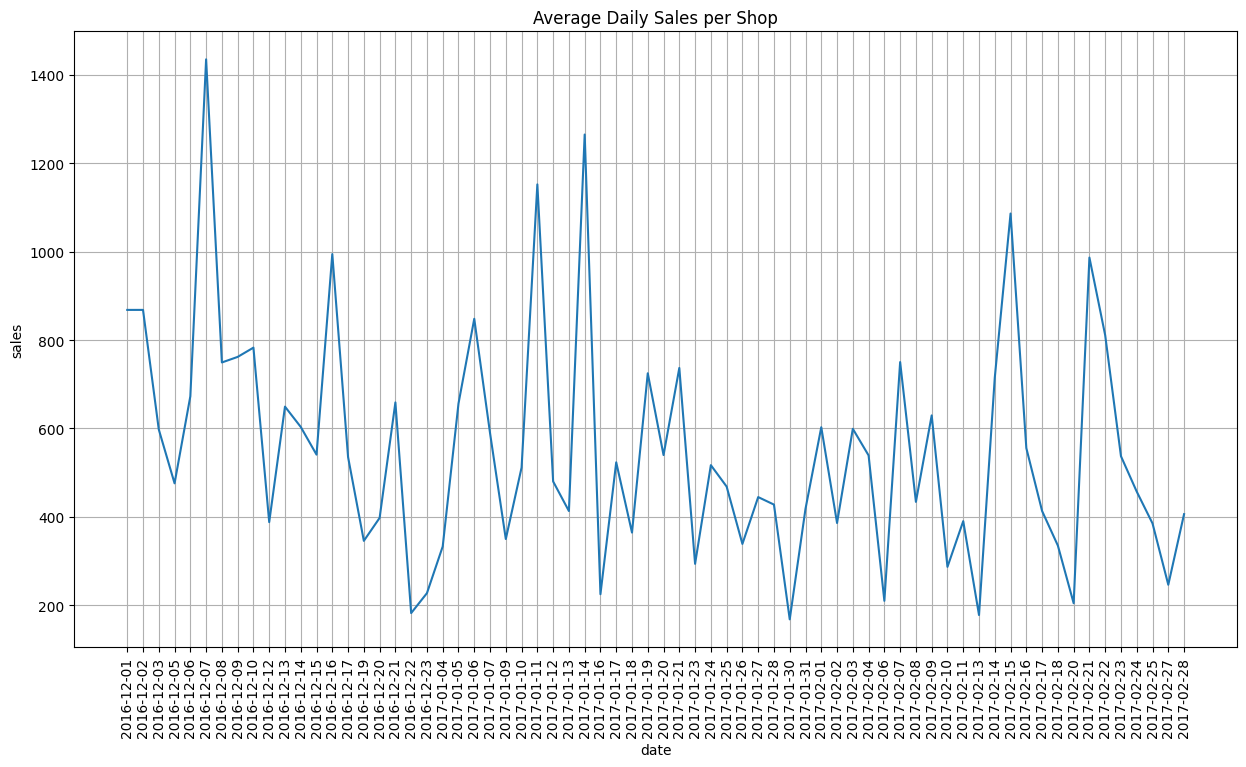

In [42]:
# Menghitung penjualan harian per gerai dan bulan
daily_shop_sales = df.pivot_table(index=['date', 'shopid'],
                                 values = 'sales',
                                 aggfunc = 'sum').reset_index()

# Menghitung rata-rata penjualan harian per gerai
avg_daily_sales_per_shop = daily_shop_sales.groupby('date').agg({'sales':'mean'}).reset_index()

# Grafik garis
line('Average Daily Sales per Shop', avg_daily_sales_per_shop, 'date', 'sales')


Trend rata-rata penjualan juga menunjukan penurunan dari Desember 2016 sampai Februari 2017.

## Rata-rata Volume Penjualan

**Rata-rata volume penjualan bulanan per gerai**

Metrik ini dihitung untuk menetapkan batasan kinerja yang akan dibandingkan dengan volome penjualan tiap gerai untuk menilai kinerja tiap gerai dari rata-rata volume penjualan bulanannya.

In [43]:
# Menghitung penjualan bulanan per gerai dan bulan
monthly_shop_sales_volume = df.pivot_table(index=['month_year', 'shopid'], 
                                           values = 'quantity',
                                           aggfunc = 'sum').reset_index()

# Menghitung rata-rata penjualan bulanan per gerai
avg_monthly_sales_volume_per_shop = monthly_shop_sales_volume.groupby('month_year').agg({'quantity':'mean'}).reset_index()

# Parameter rata-rata penjualan bulanan per gerai
avg_monthly_sales_volume_per_shop_param = round(avg_monthly_sales_volume_per_shop['quantity'].mean(),2)

print('Rata-rata volume penjualan bulanan per gerai :', avg_monthly_sales_volume_per_shop_param )

Rata-rata volume penjualan bulanan per gerai : 8841.0


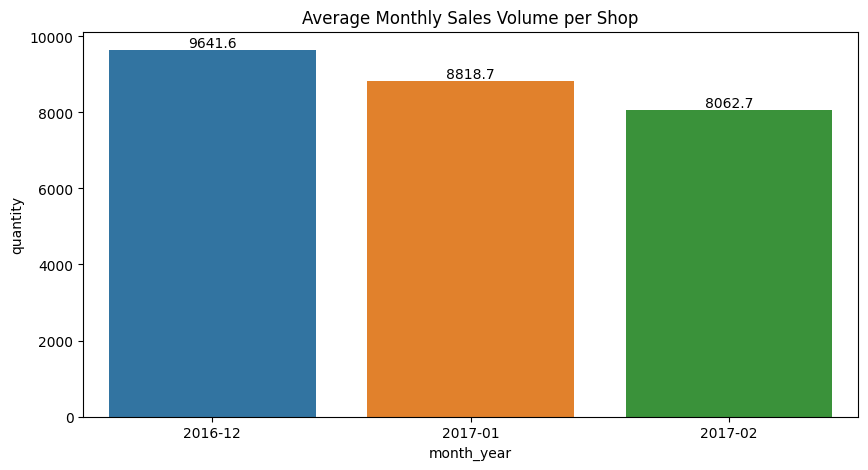

In [44]:
bar('Average Monthly Sales Volume per Shop', avg_monthly_sales_volume_per_shop, 'month_year', 'quantity' )

Rata-rata volume penjualan per gerai mengalami penurunan dari Desember 2016 sampai Februari 2017.

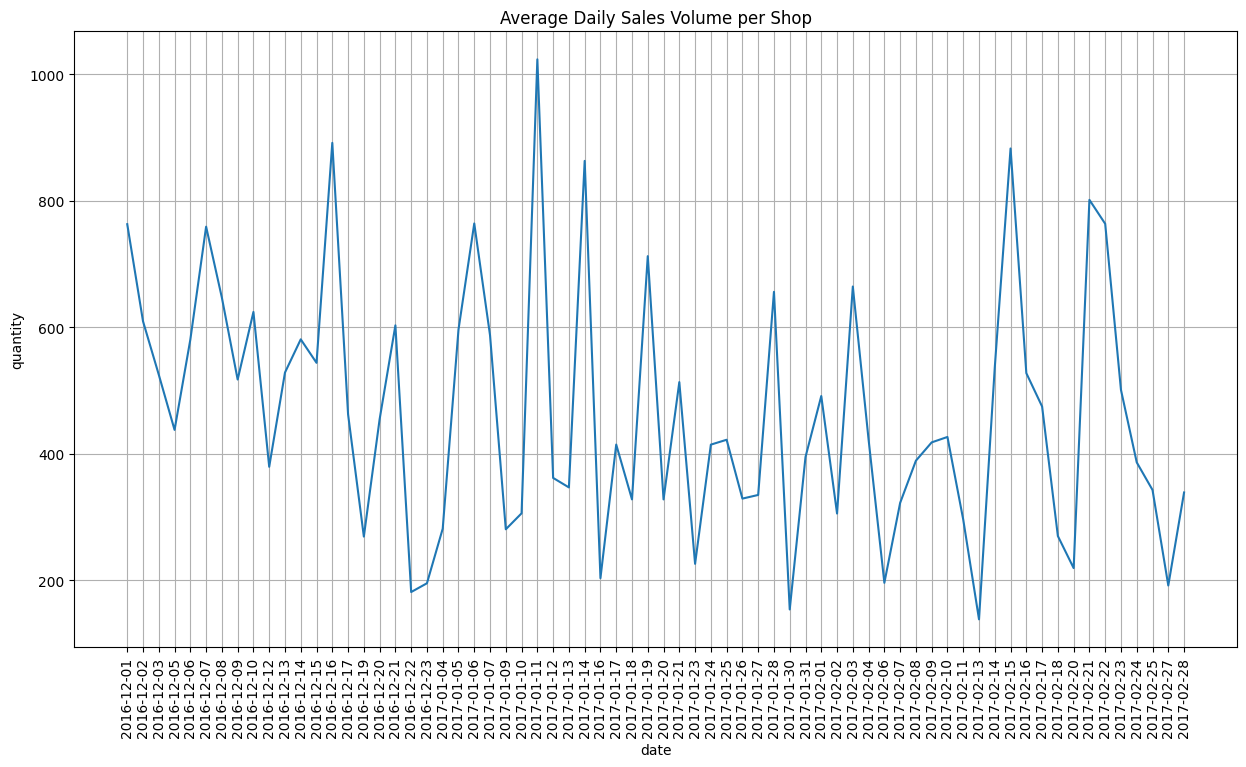

In [45]:
# Menghitung penjualan harian per gerai dan bulan
daily_shop_sales_volume = df.pivot_table(index=['date', 'shopid'],
                                 values = 'quantity',
                                 aggfunc = 'sum').reset_index()

# Menghitung rata-rata penjualan harian per gerai
avg_daily_sales_volume_per_shop = daily_shop_sales_volume.groupby('date').agg({'quantity':'mean'}).reset_index()

# Grafik garis
line('Average Daily Sales Volume per Shop', avg_daily_sales_volume_per_shop, 'date', 'quantity' )


Trend rata-rata volume penjualan juga menunjukan penurunan dari Desember 2016 sampai Februari 2017.

## Kesimpulan

**Kinerja penjualan secara keseluruhan :**

1. Penjualan mengalami penurunan dari periode Desember 2016 sampai Februari 2017.
2. Volume penjualan mengalami penurunan dari periode Desember 2106 sampai Februari 2017.
3. Rata-rata penjualan per gerai mengalami penurunan dari periode Desember 2016 sampai Februari 2017.
4. Rata-rata volume penjualan per gerai mengalami penurunan dari periode Desember 2016 sampai Februari 2017.

# Jumlah Anggota yang Melakukan Transaksi

Tentu saja, jangan membuang jumlah keanggotaan Anda sepenuhnya. Untuk advokasi, hal ini dapat mewakili pengaruh kolektif asosiasi Anda. Untuk pemasaran, ini dapat menandakan luasnya komunitas di mana anggotanya dapat menjadi bagiannya. Dan jika Anda telah menentukan bahwa pertumbuhan keanggotaan akan mendukung misi Anda, maka hal ini merupakan indikator utama kemajuan. Tapi itu hanya satu dari sekian banyak angka yang harus Anda lacak, dan ini adalah angka yang agak sederhana. https://associationsnow.com/2014/06/apples-oranges-counting-members-isnt-always-useful/

## Total Anggota

In [46]:
# Menghitung jumlah anggota yang melakukan transaksi per bulan
monthly_members = df.pivot_table(index='month_year', values='customerid', aggfunc='nunique').reset_index()

# Merubah nama kolom
monthly_members = monthly_members.rename(columns={'customerid' : 'n_members'})

monthly_members

,month_year,n_members
0,2016-12,1201
1,2017-01,997
2,2017-02,957


Jumlah anggota yang melakukan transaksi secara keseluruhan mengalami penurunan.

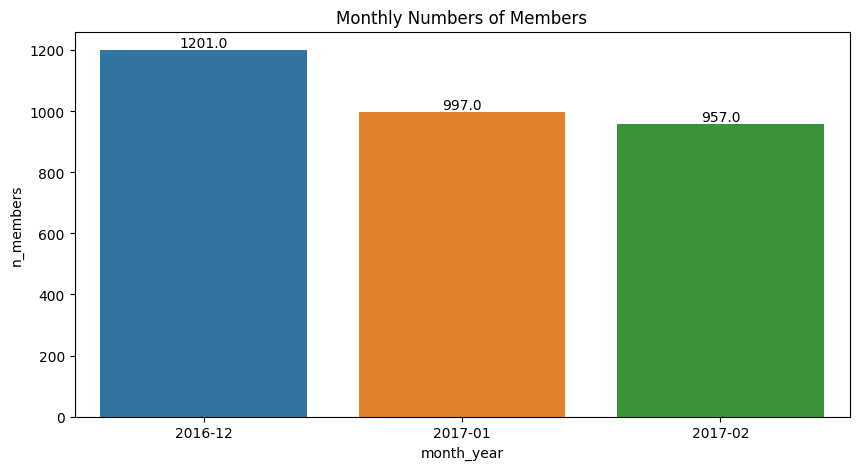

In [47]:
bar('Monthly Numbers of Members', monthly_members, 'month_year', 'n_members')

Jumlah anggota yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 terus menurun.

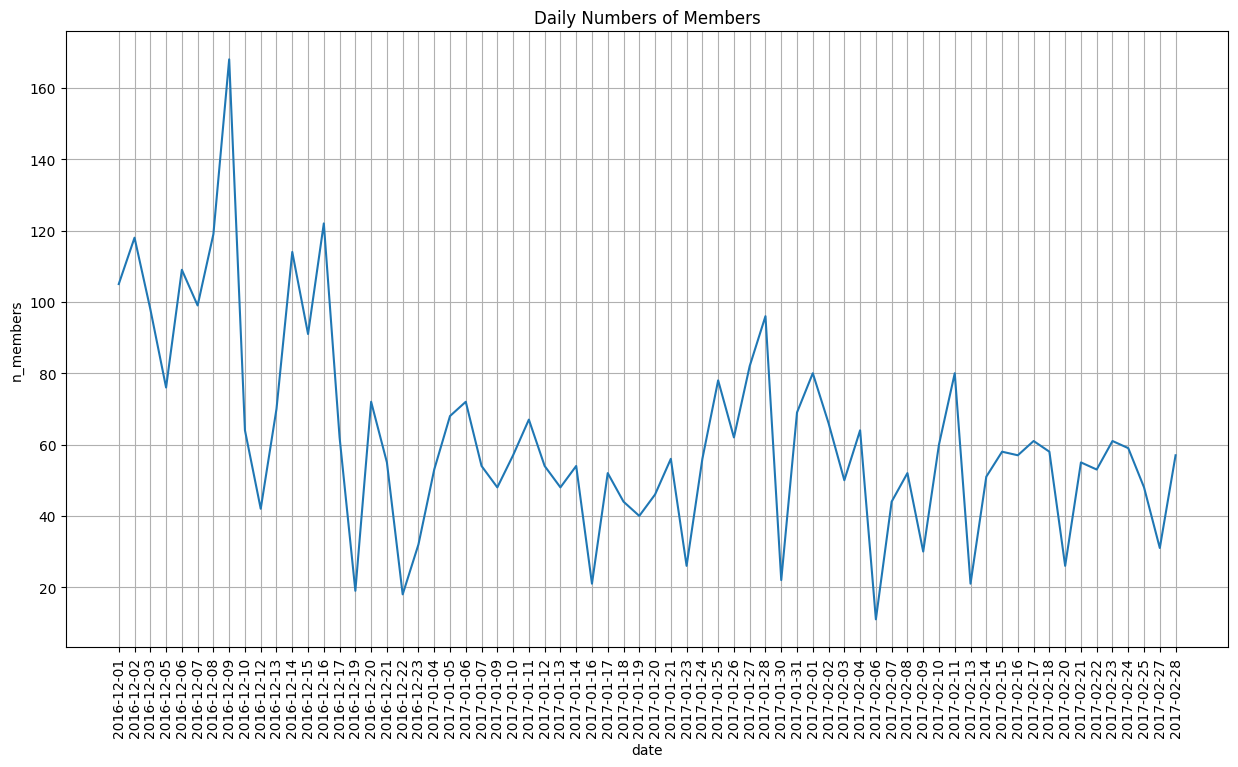

In [48]:
# Menghitung jumlah anggota yang melakukan transaksi per hari
daily_members = df.pivot_table(index='date', values='customerid', aggfunc='nunique').reset_index()

# Merubah nama kolom
daily_members = daily_members.rename(columns={'customerid':'n_members'})

# Grafik garis
line('Daily Numbers of Members', daily_members, 'date', 'n_members')

Trend harian jumlah anggota yang melakukan transaksi terus menurun.

## Anggota Reguler

In [49]:
# Irisan data transaksi anggota reguler
df_r = df.query('loyalty_program == 0')

# Menghitung jumlah anggota yang melakukan transaksi per bulan
monthly_members_reg = df_r.pivot_table(index='month_year', values='customerid', aggfunc='nunique').reset_index()

# Merubah nama kolom
monthly_members_reg = monthly_members_reg.rename(columns={'customerid':'n_members'})

monthly_members_reg

,month_year,n_members
0,2016-12,858
1,2017-01,759
2,2017-02,689


Jumlah anggota reguler yang melakukan transaksi terus menurun.

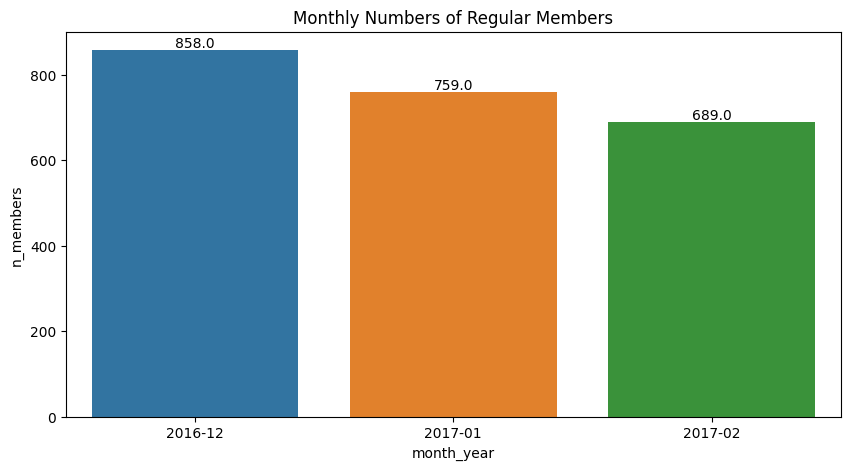

In [50]:
bar('Monthly Numbers of Regular Members', monthly_members_reg, 'month_year', 'n_members')

Jumlah anggota reguler yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 terus menurun.

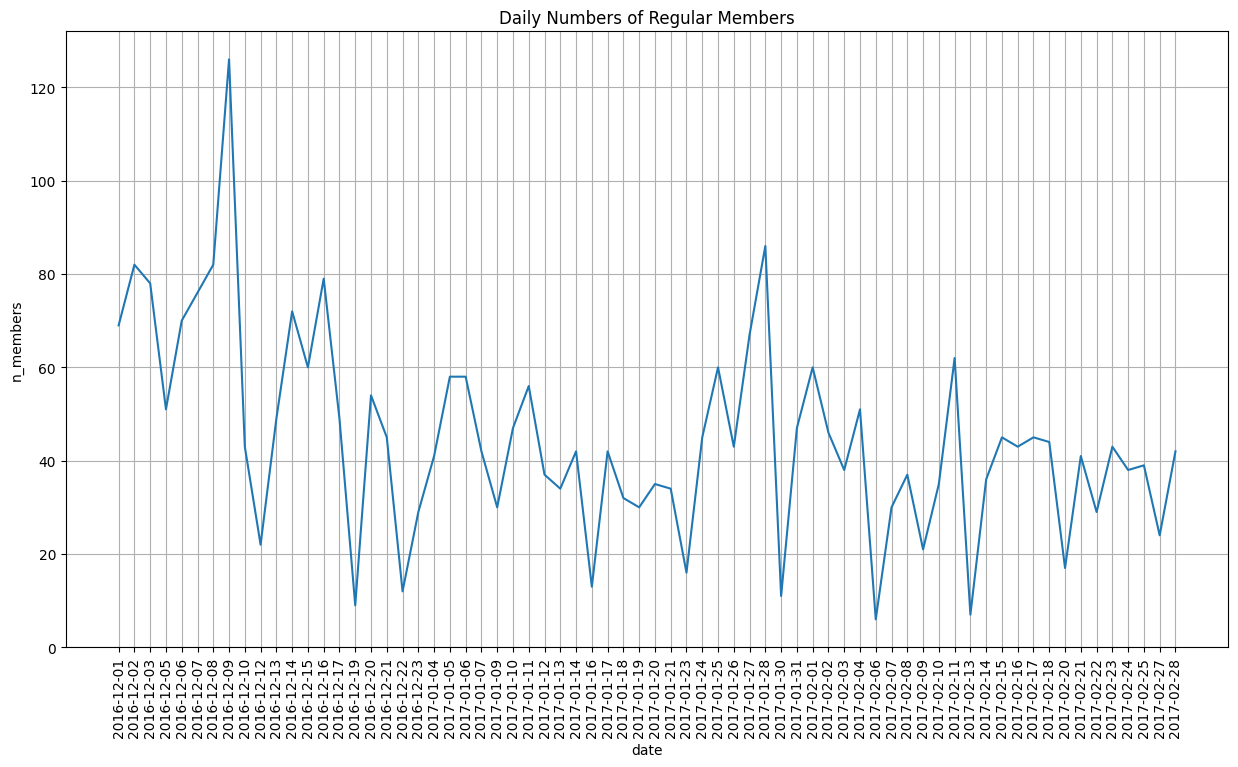

In [51]:
# Menghitung jumlah anggota reguler yang melakukan transaksi per hari
daily_members_reg = df_r.pivot_table(index='date', values='customerid', aggfunc='nunique').reset_index()

# Merubah nama kolom
daily_members_reg = daily_members_reg.rename(columns={'customerid':'n_members'})

# Grafik garis
line('Daily Numbers of Regular Members', daily_members_reg, 'date', 'n_members')

Trend harian jumlah anggota reguler yang melakukan transaksi terus menurun.

## Anggota Loyalitas

In [52]:
# Irisan data transaksi anggota loyalitas
df_l = df.query('loyalty_program == 1')

# Menghitung jumlah anggota yang melakukan transaksi per bulan
monthly_members_loy = df_l.pivot_table(index='month_year', values='customerid', aggfunc='nunique').reset_index()

# Merubah nama kolom
monthly_members_loy = monthly_members_loy.rename(columns={'customerid':'n_members'})

monthly_members_loy

,month_year,n_members
0,2016-12,343
1,2017-01,238
2,2017-02,268


Jumlah anggota loyalitas yang melakukan transaksi menurun. Terdapat peningkatan di bulan Februari 2017 namun tidak banyak.

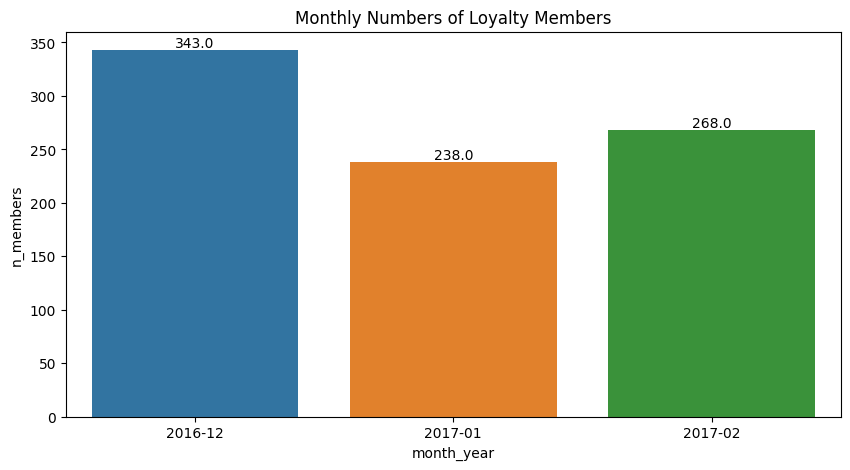

In [53]:
bar('Monthly Numbers of Loyalty Members',monthly_members_loy, 'month_year', 'n_members' )

Jumlah anggota loyalitas yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 menurun. Terdapat sedikit peningkatan di bulan Februari 2017.

In [54]:
# Menghitung jumlah anggota loyalitas yang melakukan transaksi per hari
date_list_l = df_l['date'].unique()

daily_members_loy = []

for date in date_list_l:
    n_members_loy = df_l[df_l['date'] == date]['customerid'].nunique()
    daily_members_loy.append((date, n_members_loy))

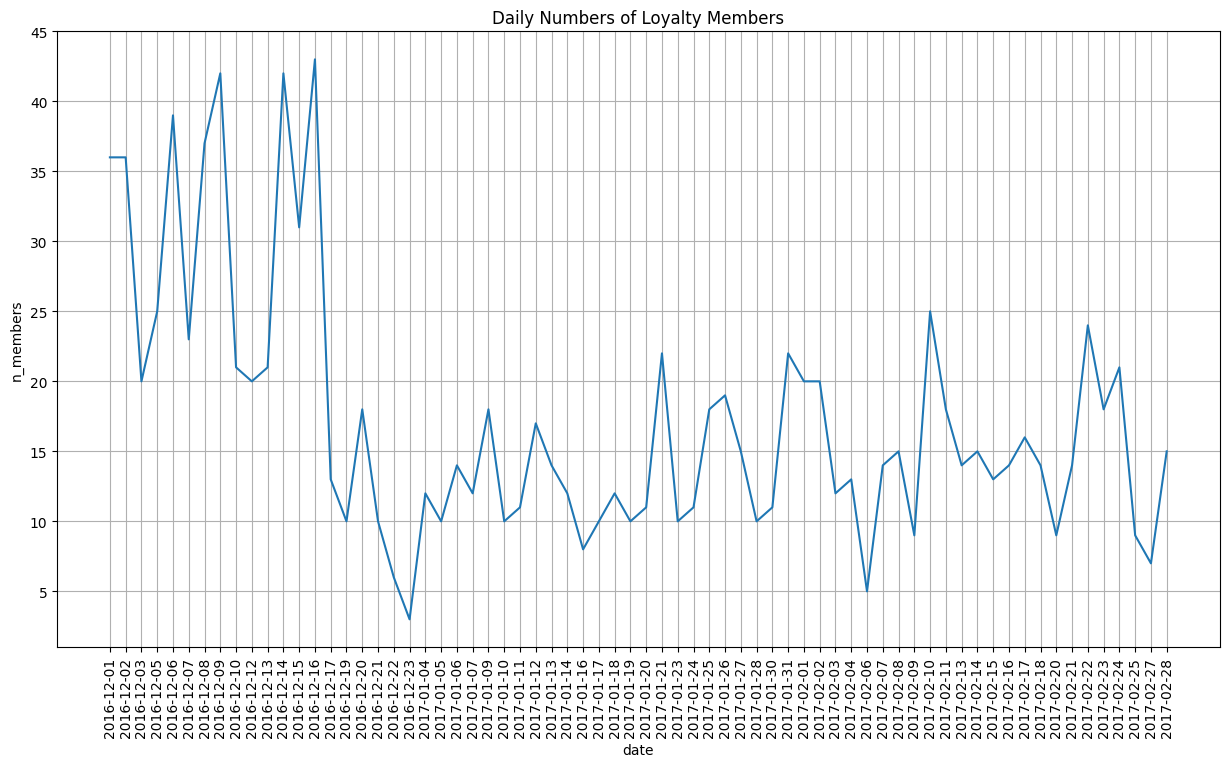

In [55]:
# Merubah menjadi dataframe
daily_members_loy = pd.DataFrame(daily_members_loy, columns=['date', 'n_members'])

daily_members_loy = daily_members_loy.sort_values('date')

# Grafik garis
line('Daily Numbers of Loyalty Members', daily_members_loy, 'date', 'n_members')


Trend harian jumlah anggota loyalitas yang melakukan transaksi menurun. Terdapat sedikit pengingkatan di bulan Februari 2017.

## Kesimpulan

**Jumlah anggota yang melakukan transaksi :**

1. Jumlah anggota secara keseluruhan yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 terus menurun.
2. Jumlah anggota reguler yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 terus menurun.
3. Jumlah anggota loyalitas yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 menurun. Terdapat sedikit peningkatan di bulan Februari 2017.


# Kinerja Penjualan Gerai

## Penjualan Bulanan Gerai

In [56]:
# Menghitung penjualan bulanan tiap gerai
monthly_sales_per_shop = df.groupby(['month_year', 'shopid']).agg({'sales':'sum'}).reset_index()


In [57]:
# Fungsi grafik bar perbandingan
def bar_comp (title, file, x, y) :
    plt.figure(figsize=(15,10))
    sns.barplot(file, x=x, y=y, hue='month_year')
    plt.title(title)
    plt.xticks(rotation = 50)
    plt.grid(True)
    plt.show()

Membuat fungsi grafik bar komparasi tiap gerai karena akan digunakan berulang.

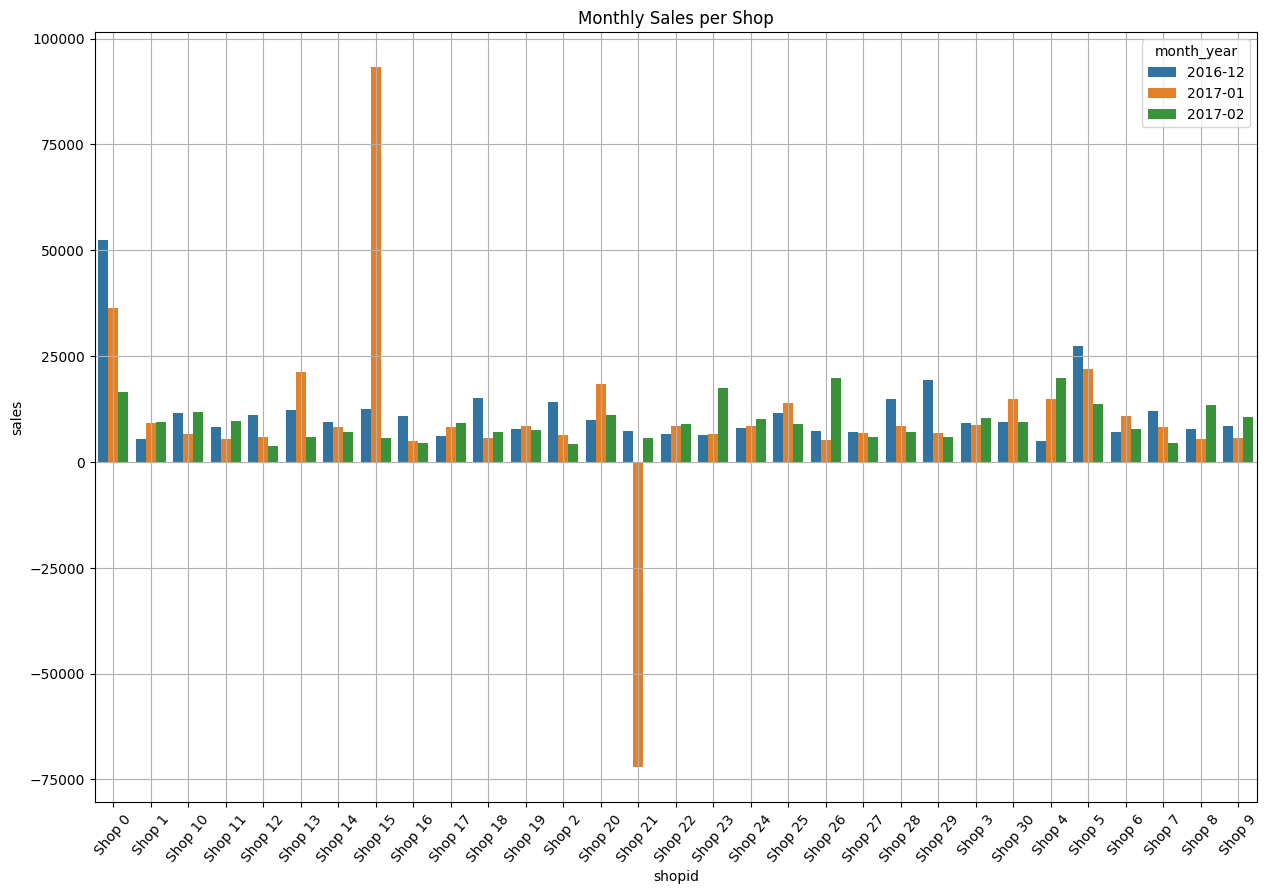

In [58]:
bar_comp('Monthly Sales per Shop', monthly_sales_per_shop, 'shopid', 'sales')

Terdapat 16 gerai yang mengalami penurunan : Shop 0, 12, 13, 14, 15, 16, 18, 19, 2, 21, 25, 27, 28, 29, 5, 7.

Terdapat 13 gerai yang mengalami peningkatan : Shop 1, 11, 17, 20, 22, 23, 24, 26, 3, 4, 6, 8, 9.

Terdapat 2 gerai dengan penjualan stabil : Shop 10, 30.

Sebagian besar gerai mengalami penurunan penjualan pada periode Desember 2016 sampai Februari 2017. Terdapat lonjakan penjualan yang tinggi pada 'Shop 15' di bulan Januari 2017 dan terdapat penurunan penjualan yang tajam pada 'Shop 21' di bulan Januari 2017 yang disebabkan pembatalan penjualan.


## Volume Penjualan Bulanan Gerai

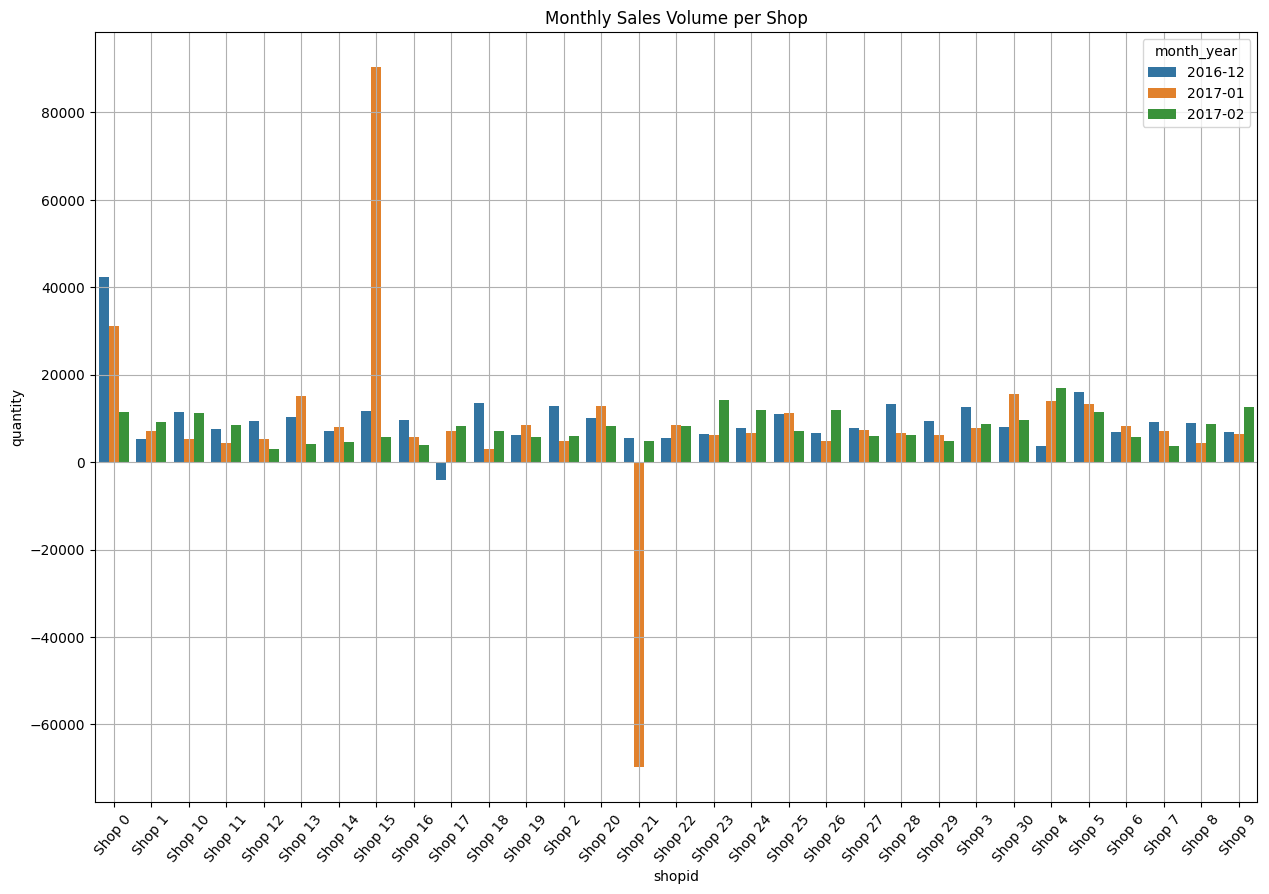

In [59]:
# Menghitung penjualan bulanan tiap gerai
monthly_sales_volume_per_shop = df.groupby(['month_year', 'shopid']).agg({'quantity':'sum'}).reset_index()

# Grafik bar komparasi tiap gerai
bar_comp('Monthly Sales Volume per Shop',monthly_sales_volume_per_shop, 'shopid', 'quantity' )

Terdapat 22 gerai yang mengalami penurunan : Shop 0, 10, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 25, 27, 28, 29, 3, 5, 6, 7, 8.

Terdapat 9 gerai yang mengalami peningkatan : Shop 1, 11, 17, 24, 25, 26, 30, 4, 9.

Sebagian besar gerai mengalami penurunan volume penjualan pada periode Desember 2016 sampai Februari 2017. Terdapat lonjakan volume penjualan yang tinggi pada 'Shop 15' di bulan Januari 2017. Terdapat penurunan volume penjualan yang tajam pada 'Shop 16' di bulan Desember 2016 dan 'Shop 21' di bulan Januari 2017 yang disebabkan besarnya volume pembatalan  penjualan.


## Total Anggota yang Melakukan Transaksi Tiap Gerai

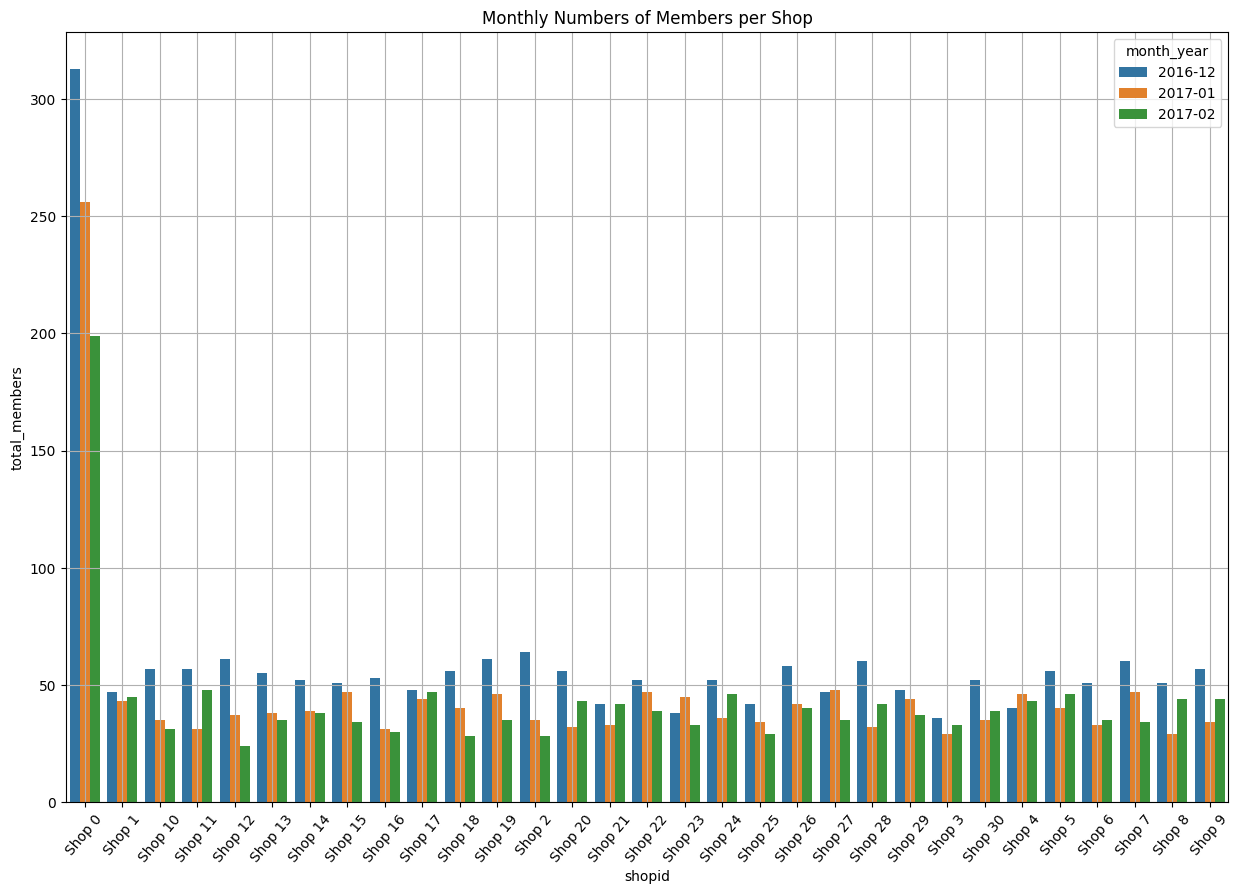

In [60]:
# Menghitung jumlah anggota yang melakukan transaksi per bulan
monthly_shop_members = df.pivot_table(index=['month_year', 'shopid'], values='customerid', aggfunc='nunique').reset_index()

# Merubah nama kolom
monthly_shop_members = monthly_shop_members.rename(columns={'customerid':'total_members'})

# Grafik bar komparasi tiap gerai
bar_comp('Monthly Numbers of Members per Shop', monthly_shop_members, 'shopid', 'total_members')


Sebagian besar jumlah anggota yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

## Anggota Reguler yang Melakukan Transaksi Tiap Gerai

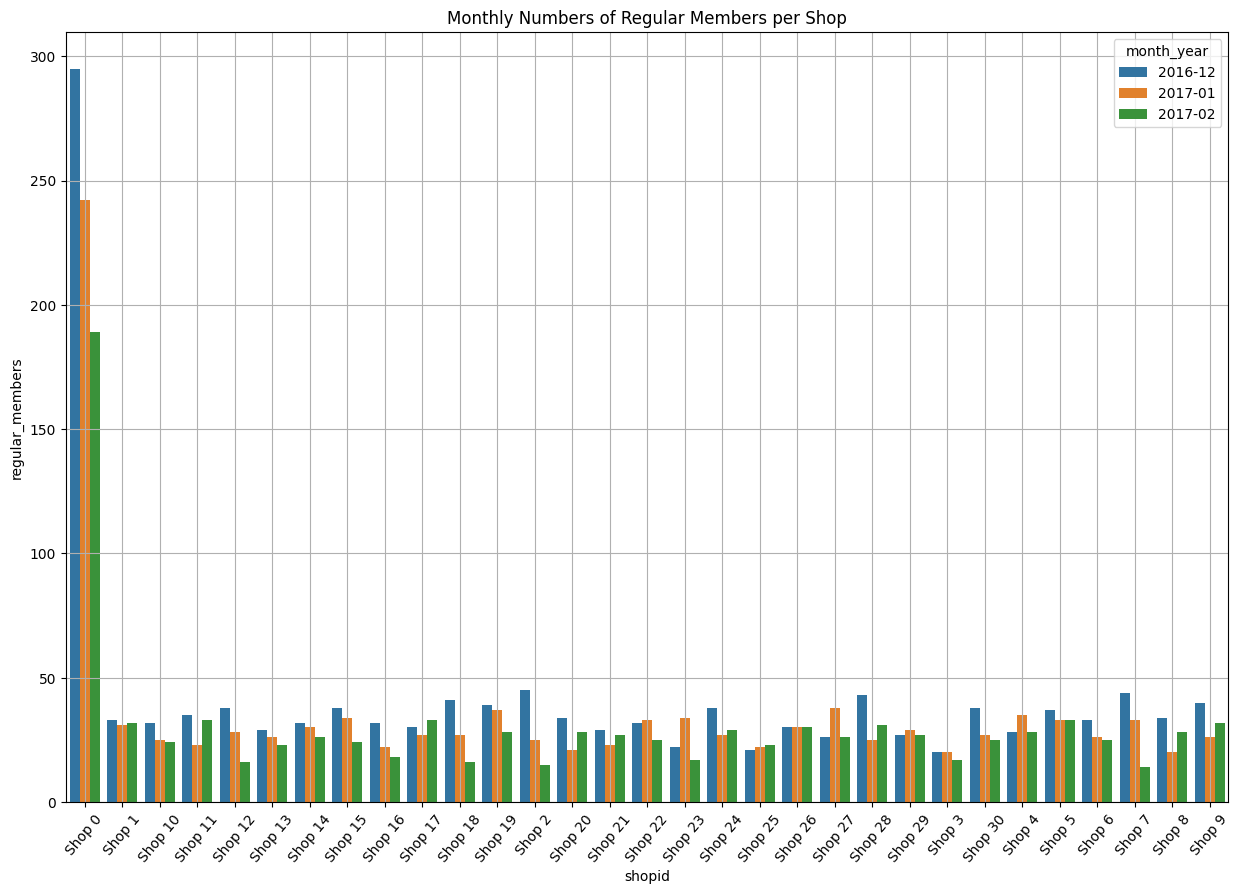

In [61]:
# Menghitung jumlah anggota reguler yang melakukan transaksi per bulan
monthly_shop_members_reg = df_r.pivot_table(index=['month_year', 'shopid'], values='customerid',
                                           aggfunc='nunique').reset_index()

# Merubah nama kolom
monthly_shop_members_reg = monthly_shop_members_reg.rename(columns={'customerid':'regular_members'})

# Grafik bar komparasi tiap gerai
bar_comp('Monthly Numbers of Regular Members per Shop', monthly_shop_members_reg, 'shopid', 'regular_members')
        

Sebagian besar jumlah anggota reguler yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

## Anggota Loyalitas yang Melakukan Transaksi Tiap Gerai

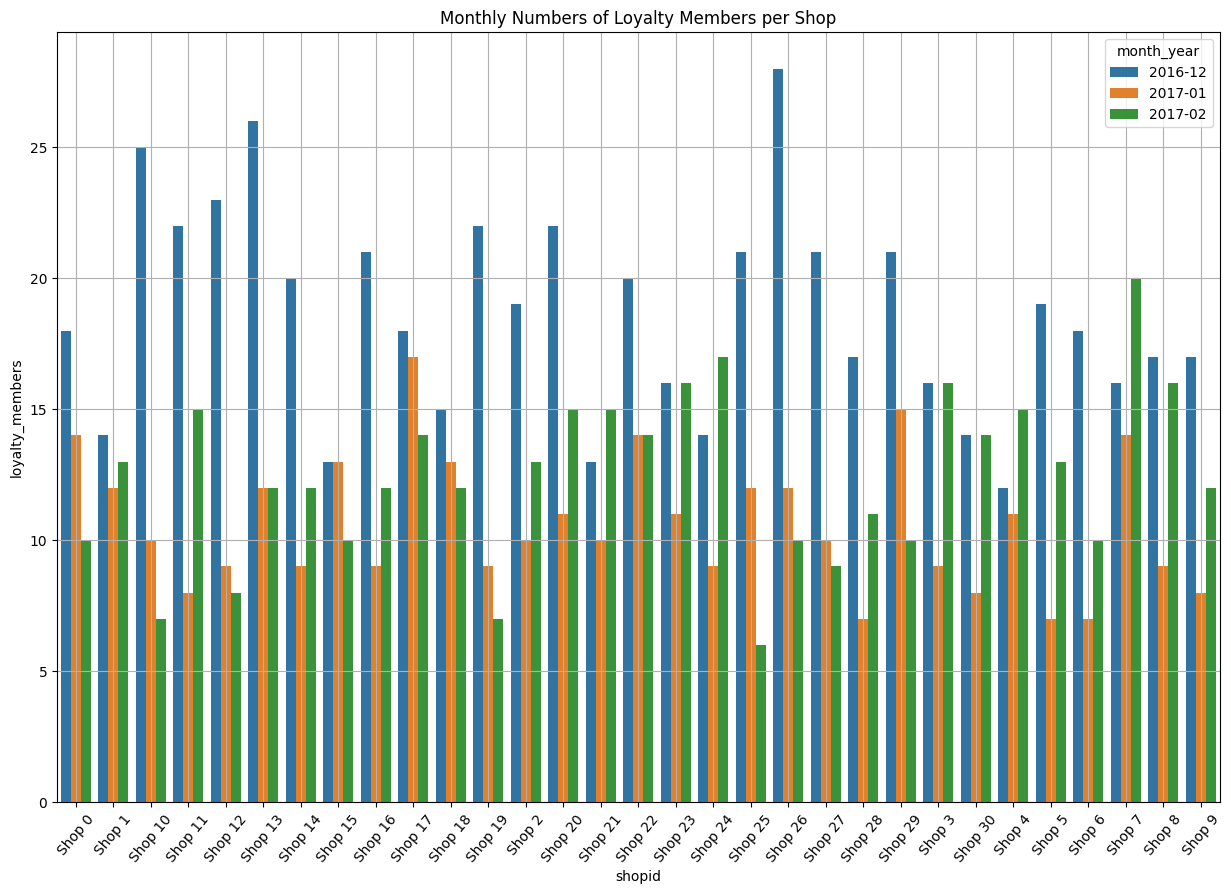

In [62]:
# Menghitung jumlah anggota reguler yang melakukan transaksi per bulan
monthly_shop_members_loy = df_l.pivot_table(index=['month_year','shopid'], values='customerid',
                                           aggfunc='nunique').reset_index()

# Merubah nama kolom
monthly_shop_members_loy = monthly_shop_members_loy.rename(columns={'customerid':'loyalty_members'})

# Grafik bar komparasi tiap gerai
bar_comp('Monthly Numbers of Loyalty Members per Shop', monthly_shop_members_loy, 'shopid', 'loyalty_members')


Sebagian besar jumlah anggota loyalitas yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

## Rata-rata Penjualan Bulanan Gerai

In [63]:
# Menghitung rata-rata penjualan bulanan tiap gerai
monthly_sales_per_shop_avg = monthly_sales_per_shop.groupby('shopid').agg({'sales':'mean'})

monthly_sales_per_shop_avg = monthly_sales_per_shop_avg.sort_values('sales', ascending = False).reset_index()

In [64]:
# Membuat fungsi bar horizontal
def bar_hor(title, file, x, y) :
    plt.figure(figsize=(15,10))
    splot = sns.barplot(file, x=x, y=y)
    
    # annotasi
    for p in splot.patches:
        width = p.get_width()
        plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
                '{:.0f}'.format(width),
                ha='center', va='center')
    plt.title(title)
    plt.show()

Membuat fungsi grafik bar horizontal karena akan digunakan berulang.

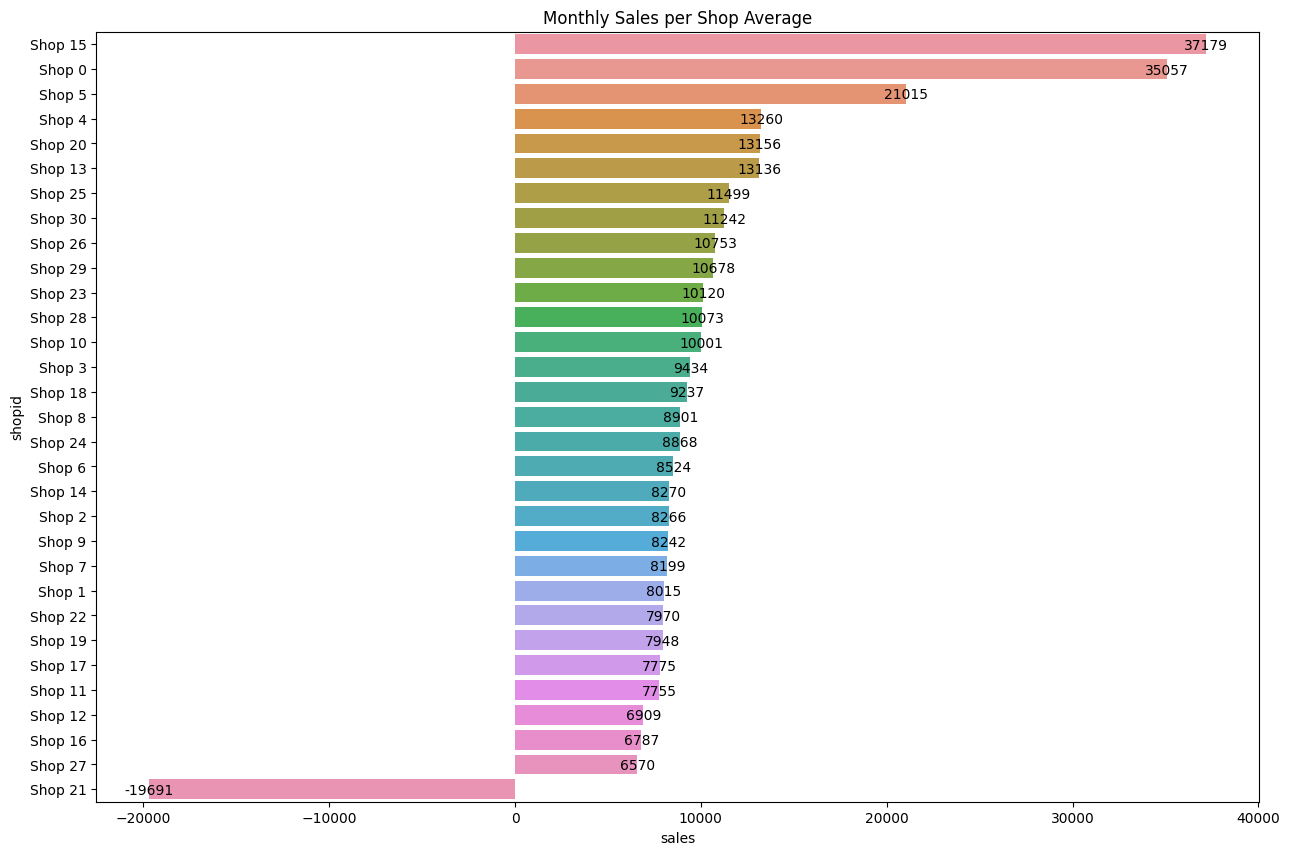

In [65]:
bar_hor('Monthly Sales per Shop Average',monthly_sales_per_shop_avg, 'sales', 'shopid' )

'Shop 15' menduduki peringkat pertama dengan rata-rata penjualan bulanan tertinggi, yang disebabkan lonjakan penjualan pada bulan Januari 2017.

'Shop 21' menduduki peringkat terakhir dengan rata-rata penjualan bulanan terendah, yang disebabkan pembatalan penjualan yang besar pada bulan Januari 2017 sehingga menyebabkan nilai rata-rata penjualan negatif.

## Rata-rata Volume Penjualan Bulanan Gerai

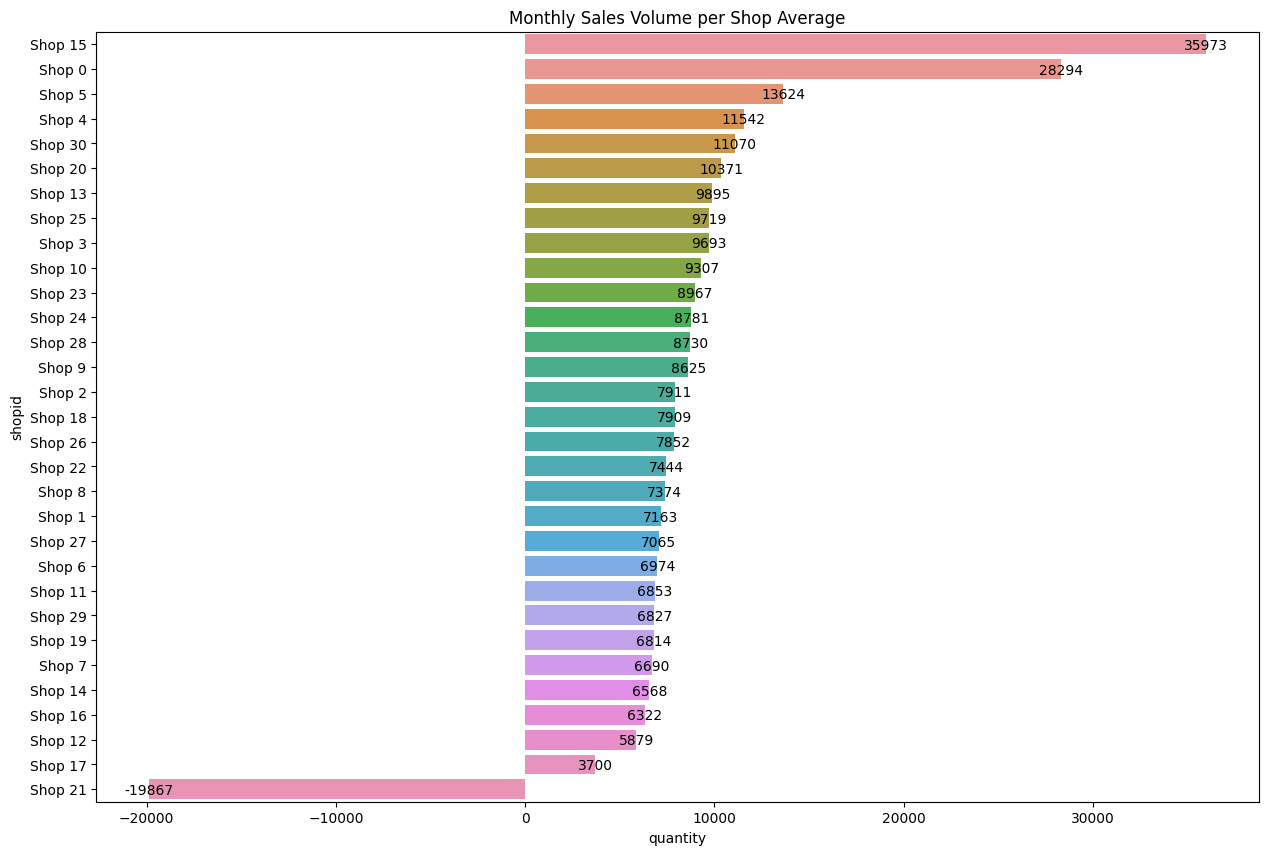

In [66]:
# Menghitung rata-rata volume penjualan bulanan tiap gerai
monthly_sales_volume_per_shop_avg = monthly_sales_volume_per_shop.groupby('shopid').agg({'quantity':'mean'})

monthly_sales_volume_per_shop_avg = monthly_sales_volume_per_shop_avg.sort_values('quantity', ascending = False).reset_index()

# Grafik bar horizontal
bar_hor('Monthly Sales Volume per Shop Average',monthly_sales_volume_per_shop_avg, 'quantity', 'shopid' )

'Shop 15' menduduki peringkat pertama dengan rata-rata volume penjualan bulanan tertinggi, yang disebabkan lonjakan volume penjualan pada bulan Januari 2017.

'Shop 21' menduduki peringkat terakhir dengan rata-rata volume penjualan bulanan terendah, yang disebabkan pembatalan penjualan yang besar pada bulan Januari 2017 sehingga menyebabkan nilai rata-rata volume penjualan negatif.

## Rata-rata Total Anggota yang Melakukan Transaksi Tiap Gerai

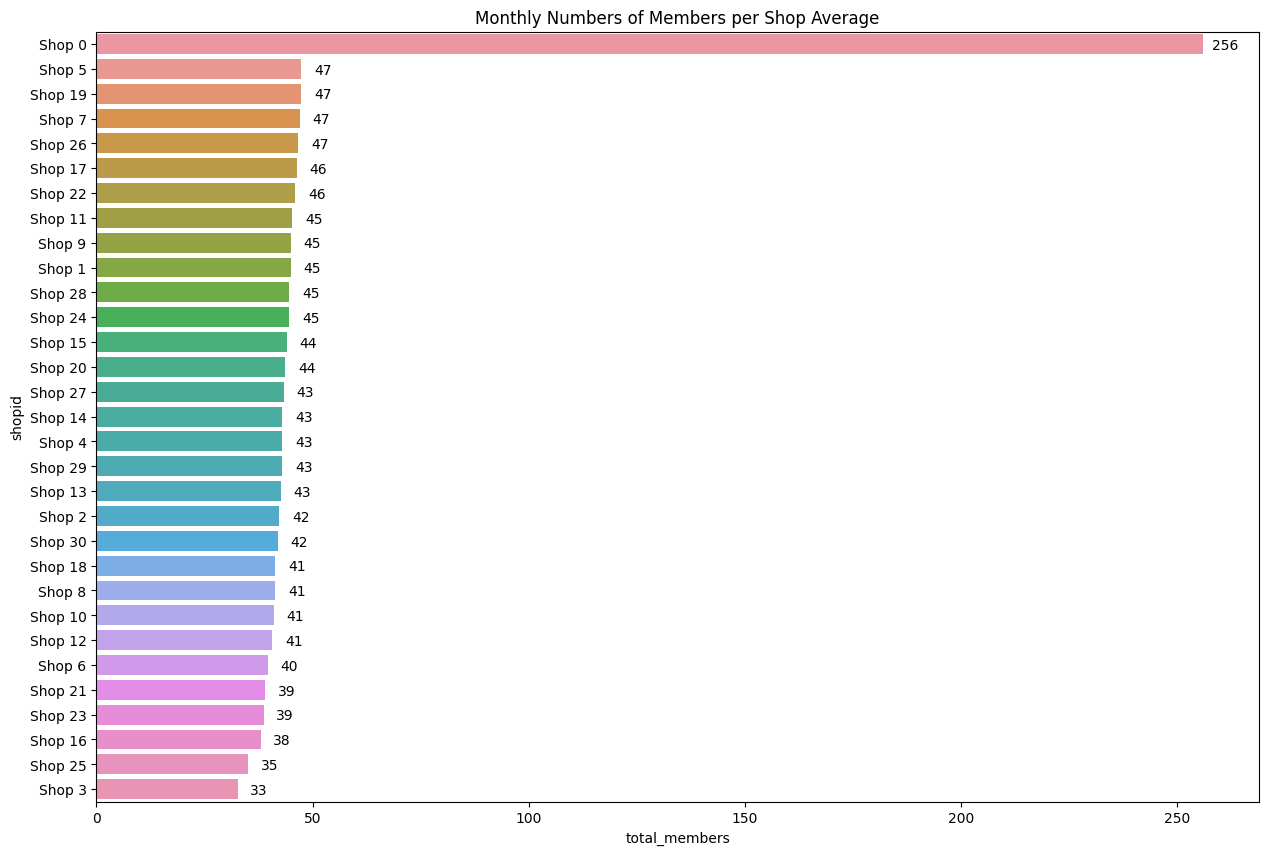

In [67]:
# Menghitung rata-rata total anggota yang bertransaksi tiap gerai
monthly_shop_members_avg = monthly_shop_members.groupby('shopid').agg({'total_members':'mean'})

monthly_shop_members_avg = monthly_shop_members_avg.sort_values('total_members', ascending = False).reset_index()

# Grafik bar horizontal
bar_hor('Monthly Numbers of Members per Shop Average',monthly_shop_members_avg, 'total_members', 'shopid' )

'Shop 0' menduduki peringkat pertama dengan rata-rata jumlah anggota yang melakukan transaksi perbulan tertinggi dan 'Shop 3' menduduki peringkat terakhir.

## Rata-rata Total Anggota Reguler yang Melakukan Transaksi Tiap Gerai

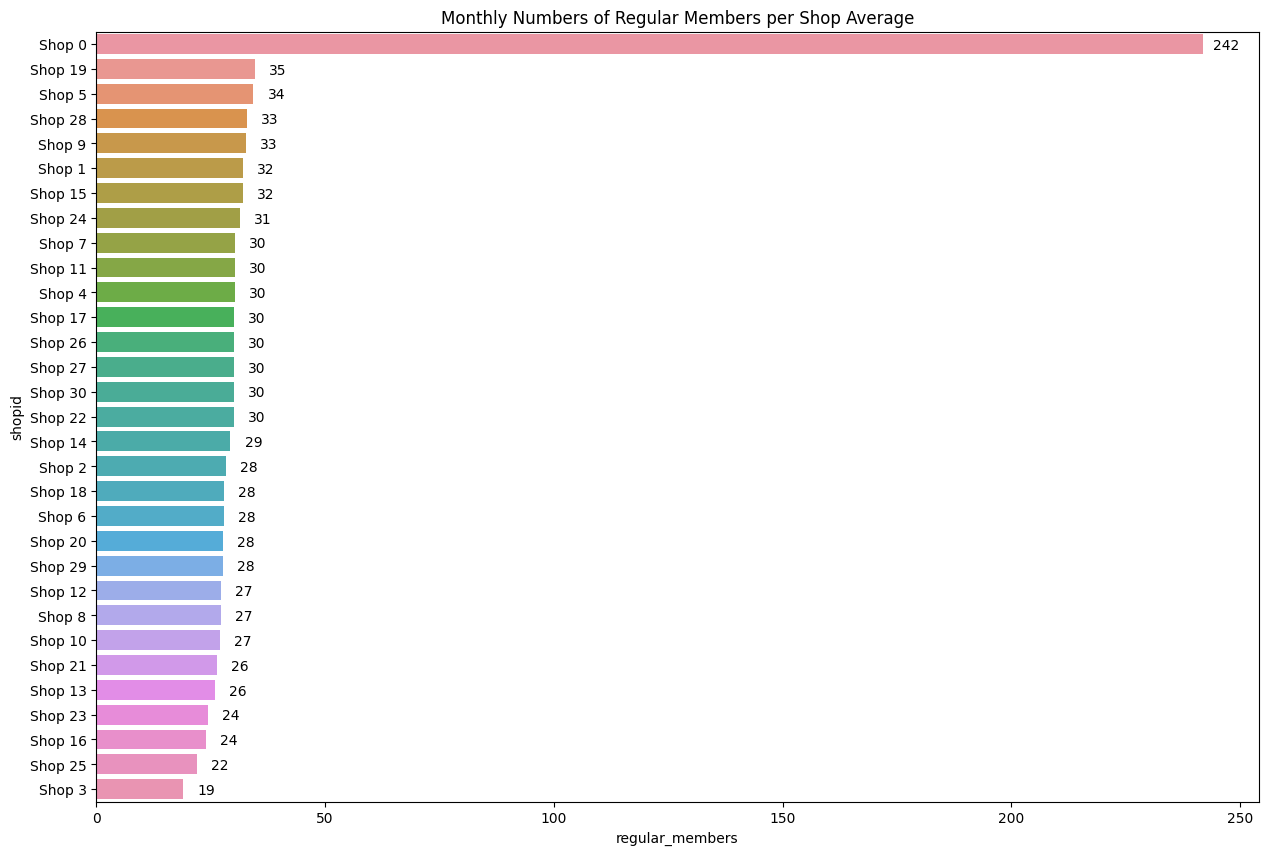

In [68]:
# Menghitung rata-rata total anggota yang bertransaksi tiap gerai
monthly_shop_members_reg_avg = monthly_shop_members_reg.groupby('shopid').agg({'regular_members':'mean'})

monthly_shop_members_reg_avg = monthly_shop_members_reg_avg.sort_values('regular_members', ascending = False).reset_index()

# Grafik bar horizontal
bar_hor('Monthly Numbers of Regular Members per Shop Average', monthly_shop_members_reg_avg, 'regular_members', 'shopid' )

'Shop 0' menduduki peringkat pertama dengan rata-rata jumlah anggota reguler yang melakukan transaksi perbulan tertinggi dan 'Shop 3' menduduki peringkat terakhir.

## Rata-rata Total Anggota Loyalitas yang Melakukan Transaksi Tiap Gerai

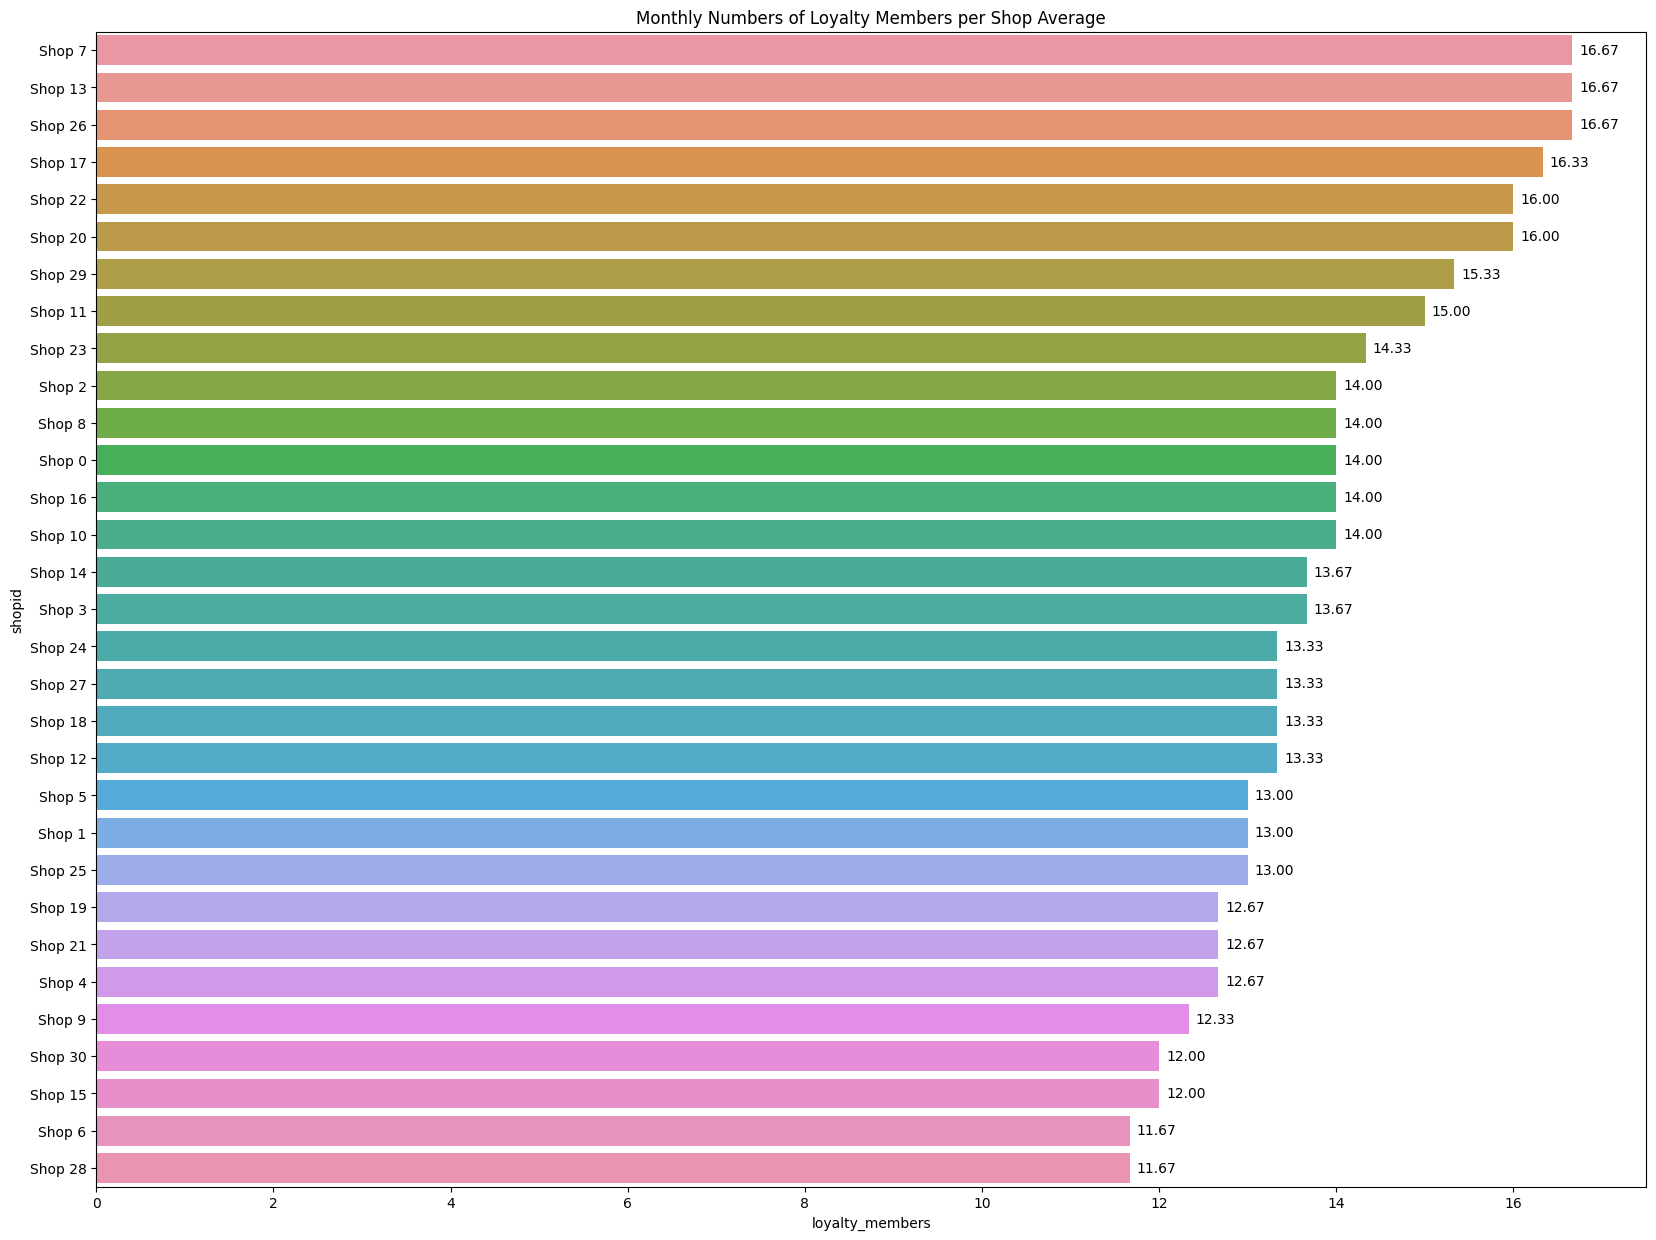

In [69]:
# Menghitung rata-rata total anggota yang bertransaksi tiap gerai
monthly_shop_members_loy_avg = monthly_shop_members_loy.groupby('shopid').agg({'loyalty_members':'mean'})

monthly_shop_members_loy_avg = monthly_shop_members_loy_avg.sort_values('loyalty_members', ascending = False).reset_index()

# Grafik bar horizontal
plt.figure(figsize=(20,15))
splot = sns.barplot(monthly_shop_members_loy_avg, x='loyalty_members', y='shopid')
    
# annotasi
for p in splot.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.5*p.get_height(),
            '{:.2f}'.format(width),
            ha='center', va='center')
plt.title('Monthly Numbers of Loyalty Members per Shop Average')
plt.show()

Terdapat 3 gerai dengan rata-rata jumlah anggota loyalitas yang melakukan transaksi perbulan tertinggi, 'Shop 7', 'Shop 13' dan 'Shop 26'. 

Terdapat 2 gerai dengan rata-rata jumlah anggota loyalitas yang melakukan transaksi perbulan terendah, 'Shop 6' dan 'Shop 28'.

## Kesimpulan

**Penjualan Bulanan Gerai :**
Sebagian besar gerai mengalami penurunan penjualan pada periode Desember 2016 sampai Februari 2017. Terdapat lonjakan penjualan yang tinggi pada 'Shop 15' di bulan Januari 2017 dan terdapat penurunan penjualan yang tajam pada 'Shop 21' di bulan Januari 2017 yang disebabkan pembatalan penjualan. 

**Volume Penjualan Bulanan Gerai :**
Sebagian besar gerai mengalami penurunan volume penjualan pada periode Desember 2016 sampai Februari 2017. Terdapat lonjakan volume penjualan yang tinggi pada 'Shop 15' di bulan Januari 2017. Terdapat penurunan volume penjualan yang tajam pada 'Shop 16' di bulan Desember 2016 dan 'Shop 21' di bulan Januari 2017 yang disebabkan besarnya volume pembatalan penjualan.

**Total Anggota yang Melakukan Transaksi Tiap Gerai :**
Sebagian besar jumlah anggota yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

**Anggota Reguler yang Melakukan Transaksi Tiap Gerai :**
Sebagian besar jumlah anggota reguler yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

**Anggota Loyalitas yang Melakukan Transaksi Tiap Gerai :**
Sebagian besar jumlah anggota loyalitas yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

**Rata-rata Penjualan Bulanan Gerai :**
'Shop 15' menduduki peringkat pertama dengan rata-rata penjualan bulanan tertinggi, yang disebabkan lonjakan penjualan pada bulan Januari 2017.
'Shop 21' menduduki peringkat terakhir dengan rata-rata penjualan bulanan terendah, yang disebabkan pembatalan penjualan yang besar pada bulan Januari 2017 sehingga menyebabkan nilai rata-rata penjualan negatif

**Rata-rata Volume Penjualan Bulanan Gerai:**
'Shop 15' menduduki peringkat pertama dengan rata-rata volume penjualan bulanan tertinggi, yang disebabkan lonjakan volume penjualan pada bulan Januari 2017.
'Shop 21' menduduki peringkat terakhir dengan rata-rata volume penjualan bulanan terendah, yang disebabkan pembatalan penjualan yang besar pada bulan Januari 2017 sehingga menyebabkan nilai rata-rata volume penjualan negatif.

**Rata-rata Total Anggota yang Melakukan Transaksi Tiap Gerai :**
'Shop 0' menduduki peringkat pertama dengan rata-rata jumlah anggota yang melakukan transaksi perbulan tertinggi dan 'Shop 3' menduduki peringkat terakhir.

**Rata-rata Total Anggota Reguler yang Melakukan Transaksi Tiap Gerai :**
'Shop 0' menduduki peringkat pertama dengan rata-rata jumlah anggota reguler yang melakukan transaksi perbulan tertinggi dan 'Shop 3' menduduki peringkat terakhir.

**Rata-rata Total Anggota Loyalitas yang Melakukan Transaksi Tiap Gerai :**
Terdapat 3 gerai dengan rata-rata jumlah anggota loyalitas yang melakukan transaksi perbulan tertinggi, 'Shop 7', 'Shop 13' dan 'Shop 26'.
Terdapat 2 gerai dengan rata-rata jumlah anggota loyalitas yang melakukan transaksi perbulan terendah, 'Shop 6' dan 'Shop 28'.



# Identifikasi Gerai yang Berkinerja Rendah

**Berdasarkan Rata-rata Penjualan Bulanan**

In [70]:
# Mengiris data gerai dengan penjualan dibawah rata-rata
under_avg = monthly_sales_per_shop_avg[monthly_sales_per_shop_avg['sales'] < avg_monthly_sales_per_shop_param]

# Membuat list gerai dengan penjualan dibawah rata-rata
under_avg_list = under_avg.set_index('shopid').index

# Jumlah gerai dengan penjualan dibawah rata-rata
print('Terdapat', len(under_avg_list), 'gerai dengan penjualan dibawah rata-rata.')

Terdapat 21 gerai dengan penjualan dibawah rata-rata.


**Berdasarkan Rata-rata Volume Penjualan Bulanan**

In [71]:
# Mengiris data gerai dengan volume penjualan dibawah rata-rata
under_avg_vol = monthly_sales_volume_per_shop_avg[monthly_sales_volume_per_shop_avg['quantity'] < avg_monthly_sales_volume_per_shop_param]

# Membuat list gerai dengan penjualan dibawah rata-rata
under_avg_vol_list = under_avg_vol.set_index('shopid').index

# Jumlah gerai dengan penjualan dibawah rata-rata
print('Terdapat', len(under_avg_vol_list), 'gerai dengan volume penjualan dibawah rata-rata.')

Terdapat 20 gerai dengan volume penjualan dibawah rata-rata.


**Menentukan Parameter Kinerja Utama**

Pada penelitian ini nilai penjualan merupakan parameter utama kinerja gerai dan terdapat 21 gerai dengan nilai penjualan dibawah rata-rata serta 20 gerai dengan volume penjualan dibawah rata-rata.

# Analisis Data Eksploratif

## Matriks Korelasi

In [73]:
# Membuat data penjualan dan volume penjualan per bulan tiap gerai
data = df.pivot_table(index=['month_year', 'shopid'], columns='loyalty_program',
                     values=['sales', 'quantity'], aggfunc='sum').reset_index()

# Menggabungkan nama kolom
data.columns = [''.join(map(str, col)).strip() for col in data.columns.values]

data.head()

,month_year,shopid,quantity0,quantity1,sales0,sales1
0,2016-12,Shop 0,40667,1633,50575.59,1745.61
1,2016-12,Shop 1,3718,1484,4139.79,1307.23
2,2016-12,Shop 10,8767,2669,9340.89,2327.01
3,2016-12,Shop 11,5032,2491,4839.51,3333.05
4,2016-12,Shop 12,7026,2352,7425.89,3705.54


Data berisi volume dan nilai penjualan kepada anggota reguler dan loyalitas.

In [74]:
# Mengganti nama kolom
data = data.rename(columns={'quantity0' : 'qty_regular',
                           'quantity1' : 'qty_loyalty',
                           'sales0' : 'sales_regular',
                           'sales1' : 'sales_loyalty'})

# Menambahkan total penjualan dan volume penjualan
data.insert(data.columns.get_loc('sales_regular'), 'qty_total', data['qty_regular'] + data['qty_loyalty'])
data['sales_total'] = data['sales_regular'] + data['sales_loyalty']

data.head()

,month_year,shopid,qty_regular,qty_loyalty,qty_total,sales_regular,sales_loyalty,sales_total
0,2016-12,Shop 0,40667,1633,42300,50575.59,1745.61,52321.20
1,2016-12,Shop 1,3718,1484,5202,4139.79,1307.23,5447.02
2,2016-12,Shop 10,8767,2669,11436,9340.89,2327.01,11667.90
3,2016-12,Shop 11,5032,2491,7523,4839.51,3333.05,8172.56
4,2016-12,Shop 12,7026,2352,9378,7425.89,3705.54,11131.43


Nama kolom sudah berubah, total penjualan dan volume penjualan sudah ditambahkan.

In [75]:
# Menggabungkan jumlah anggota reguler ke data
data = data.merge(monthly_shop_members_reg, left_on=['month_year', 'shopid'], right_on=['month_year', 'shopid'], how='left')

data.head()

,month_year,shopid,qty_regular,qty_loyalty,qty_total,sales_regular,sales_loyalty,sales_total,regular_members
0,2016-12,Shop 0,40667,1633,42300,50575.59,1745.61,52321.20,295
1,2016-12,Shop 1,3718,1484,5202,4139.79,1307.23,5447.02,33
2,2016-12,Shop 10,8767,2669,11436,9340.89,2327.01,11667.90,32
3,2016-12,Shop 11,5032,2491,7523,4839.51,3333.05,8172.56,35
4,2016-12,Shop 12,7026,2352,9378,7425.89,3705.54,11131.43,38


Data sudah ditambahkan jumlah total anggota reguler yang melakukan transaksi tiap bulan per gerai.

In [76]:
# Menggabungkan jumlah anggota loyalitas ke data
data = data.merge(monthly_shop_members_loy, left_on=['month_year', 'shopid'], right_on=['month_year', 'shopid'], how='left')

data.head()

,month_year,shopid,qty_regular,qty_loyalty,qty_total,sales_regular,sales_loyalty,sales_total,regular_members,loyalty_members
0,2016-12,Shop 0,40667,1633,42300,50575.59,1745.61,52321.20,295,18
1,2016-12,Shop 1,3718,1484,5202,4139.79,1307.23,5447.02,33,14
2,2016-12,Shop 10,8767,2669,11436,9340.89,2327.01,11667.90,32,25
3,2016-12,Shop 11,5032,2491,7523,4839.51,3333.05,8172.56,35,22
4,2016-12,Shop 12,7026,2352,9378,7425.89,3705.54,11131.43,38,23


Data sudah ditambahkan jumlah total anggota loyalitas yang melakukan transaksi tiap bulan per gerai.

In [77]:
# Menggabungkan jumlah total anggota ke data
data = data.merge(monthly_shop_members, left_on=['month_year', 'shopid'], right_on=['month_year', 'shopid'], how='left')

data.head()

,month_year,shopid,qty_regular,qty_loyalty,qty_total,sales_regular,sales_loyalty,sales_total,regular_members,loyalty_members,total_members
0,2016-12,Shop 0,40667,1633,42300,50575.59,1745.61,52321.20,295,18,313
1,2016-12,Shop 1,3718,1484,5202,4139.79,1307.23,5447.02,33,14,47
2,2016-12,Shop 10,8767,2669,11436,9340.89,2327.01,11667.90,32,25,57
3,2016-12,Shop 11,5032,2491,7523,4839.51,3333.05,8172.56,35,22,57
4,2016-12,Shop 12,7026,2352,9378,7425.89,3705.54,11131.43,38,23,61


Data sudah ditambahkan jumlah total anggota yang melakukan transaksi tiap bulan per gerai.

<Axes: >

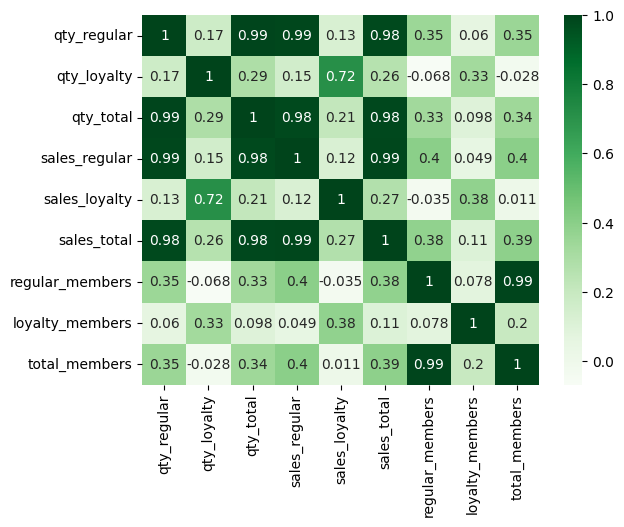

In [78]:
# Melihat korelasi
cm = data.drop(['month_year', 'shopid'], axis=1).corr()

sns.heatmap(cm, annot=True, cmap='Greens')

**Korelasi fitur terhadap total penjualan (sales_total) :**
1. qty_regular (0,97), volume penjualan ke anggota reguler memiliki korelasi positif sangat kuat terhadap total penjualan.
2. qty_loyalty (0,25), volume penjualan ke anggota loyalitas memiliki korelasi positif sedang terhadap total penjualan.
3. qty_total (0,98), total volume penjualan memiliki korelasi positif sangat kuat terhadap total penjualan.
4. sales_regular (0,98), penjualan ke anggota reguler memiliki korelasi positif sangat kuat terhadap total penjualan.
5. sales_loyalty (0,27), penjualan ke anggota loyalitas memiliki korelasi positif sedang terhadap total penjualan.
6. regular_members (0,38), jumlah anggota reguler yang melakukan transaksi memiliki korelasi positif sedang terhadap total penjualan.
7. loyalty_members (0,10), jumlah anggota loyaliyas yang melakukan transaksi memiliki korelasi lemah terhadap total penjualan.
8. total_members (0,38), total jumlah anggota yang melakukan transaksi memiliki korelasi positif sedang terhadap total penjualan.

## Parameter Gerai dengan Kinerja Tinggi

array([[<Axes: title={'center': 'qty_regular'}>,
        <Axes: title={'center': 'qty_loyalty'}>,
        <Axes: title={'center': 'qty_total'}>],
       [<Axes: title={'center': 'sales_regular'}>,
        <Axes: title={'center': 'sales_loyalty'}>,
        <Axes: title={'center': 'sales_total'}>],
       [<Axes: title={'center': 'regular_members'}>,
        <Axes: title={'center': 'loyalty_members'}>,
        <Axes: title={'center': 'total_members'}>]], dtype=object)

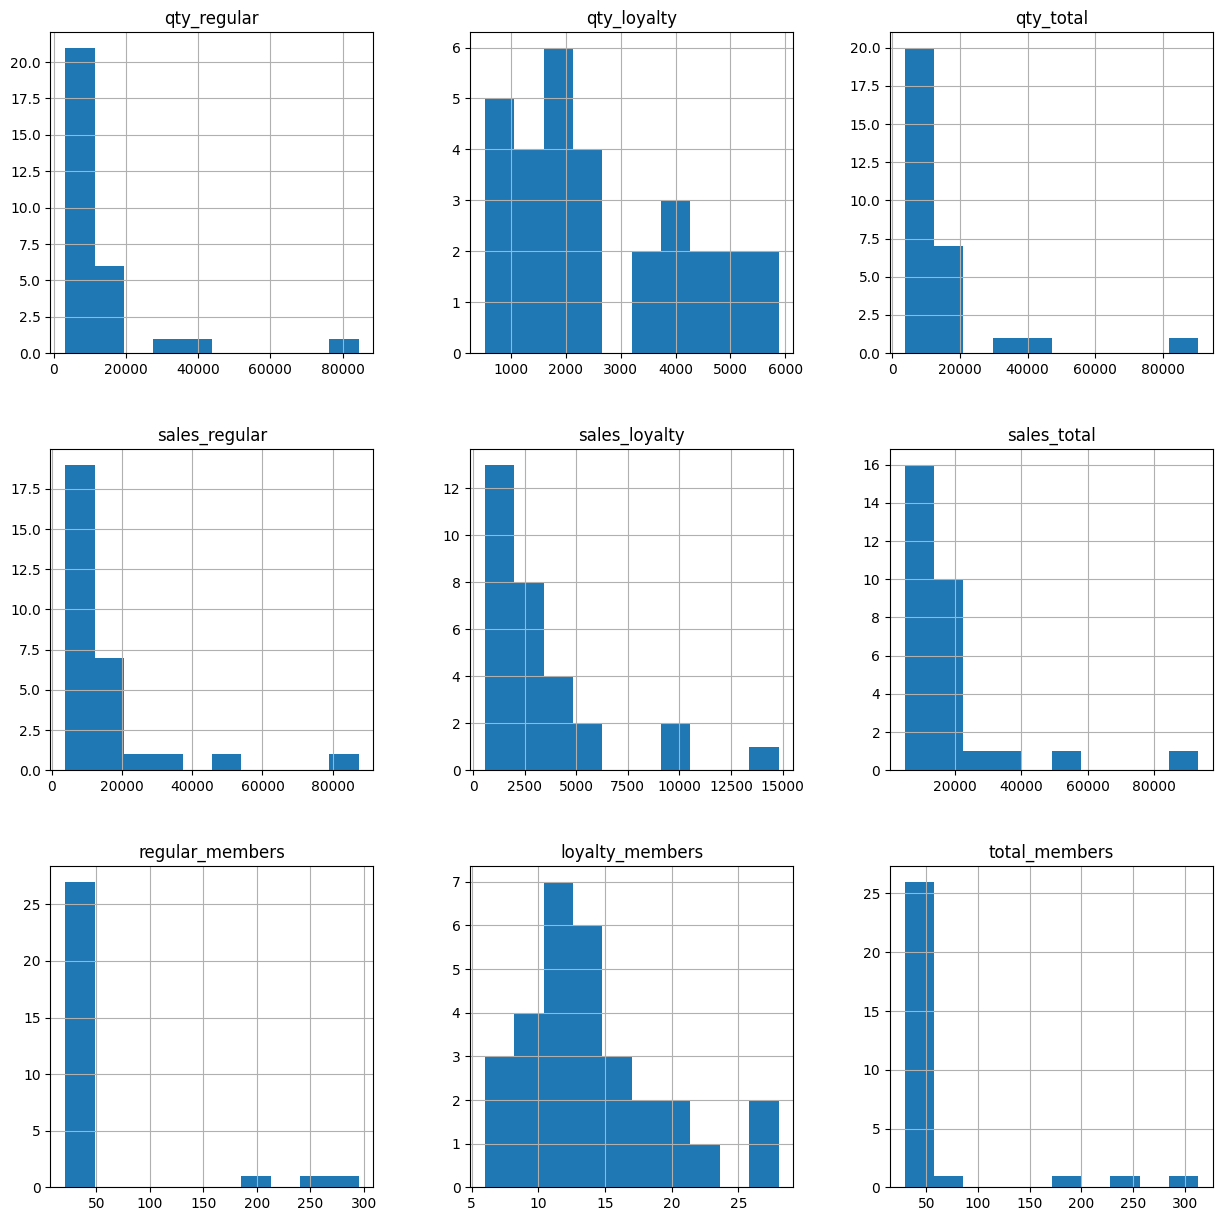

In [79]:
# Membuat irisan data gerai dengan kinerja tinggi
high = data[~data['shopid'].isin(under_avg_list)]

# Grafik histogram
high.hist(figsize=(15,15))

**Karakteristik dari gerai yang berkinerja tinggi :**
1. qty_regular, kebanyakan volume penjualan ke anggota reguler pada rentang 1-200.000 per bulan.
2. qty_loyalty, kebanyakan volume penjualan ke anggota loyalitas pada rentang 1-2600 per bulan.
3. qty_total, kebanyakan total volume penjualan pada rentang 1-200.000 per bulan.
4. sales_regular, kebanyakan penjualan ke anggota reguler pada rentang 1-200.000 per bulan.
5. sales_loyalty, kebanyakan penjualan ke anggota loyalitas pada rentang 1-4000 per bulan.
6. sales_total, kebanyakan total penjualan  pada rentang 1-200.000 per bulan.
7. regular_members, kebanyakan jumlah anggota reguler yang melakukan transaksi pada rentang 1-50 anggota per bulan.
8. loyalty_members, kebanyakan jumlah anggota loyalitas yang melakukan transaksi para dentang 1-15 anggota per bulan.
9. total_members, kebanyakan total jumlah anggota yang melakukan transaksi pada rentang 1-50 anggota per bulan.


## Parameter Gerai dengan Kinerja Rendah

array([[<Axes: title={'center': 'qty_regular'}>,
        <Axes: title={'center': 'qty_loyalty'}>,
        <Axes: title={'center': 'qty_total'}>],
       [<Axes: title={'center': 'sales_regular'}>,
        <Axes: title={'center': 'sales_loyalty'}>,
        <Axes: title={'center': 'sales_total'}>],
       [<Axes: title={'center': 'regular_members'}>,
        <Axes: title={'center': 'loyalty_members'}>,
        <Axes: title={'center': 'total_members'}>]], dtype=object)

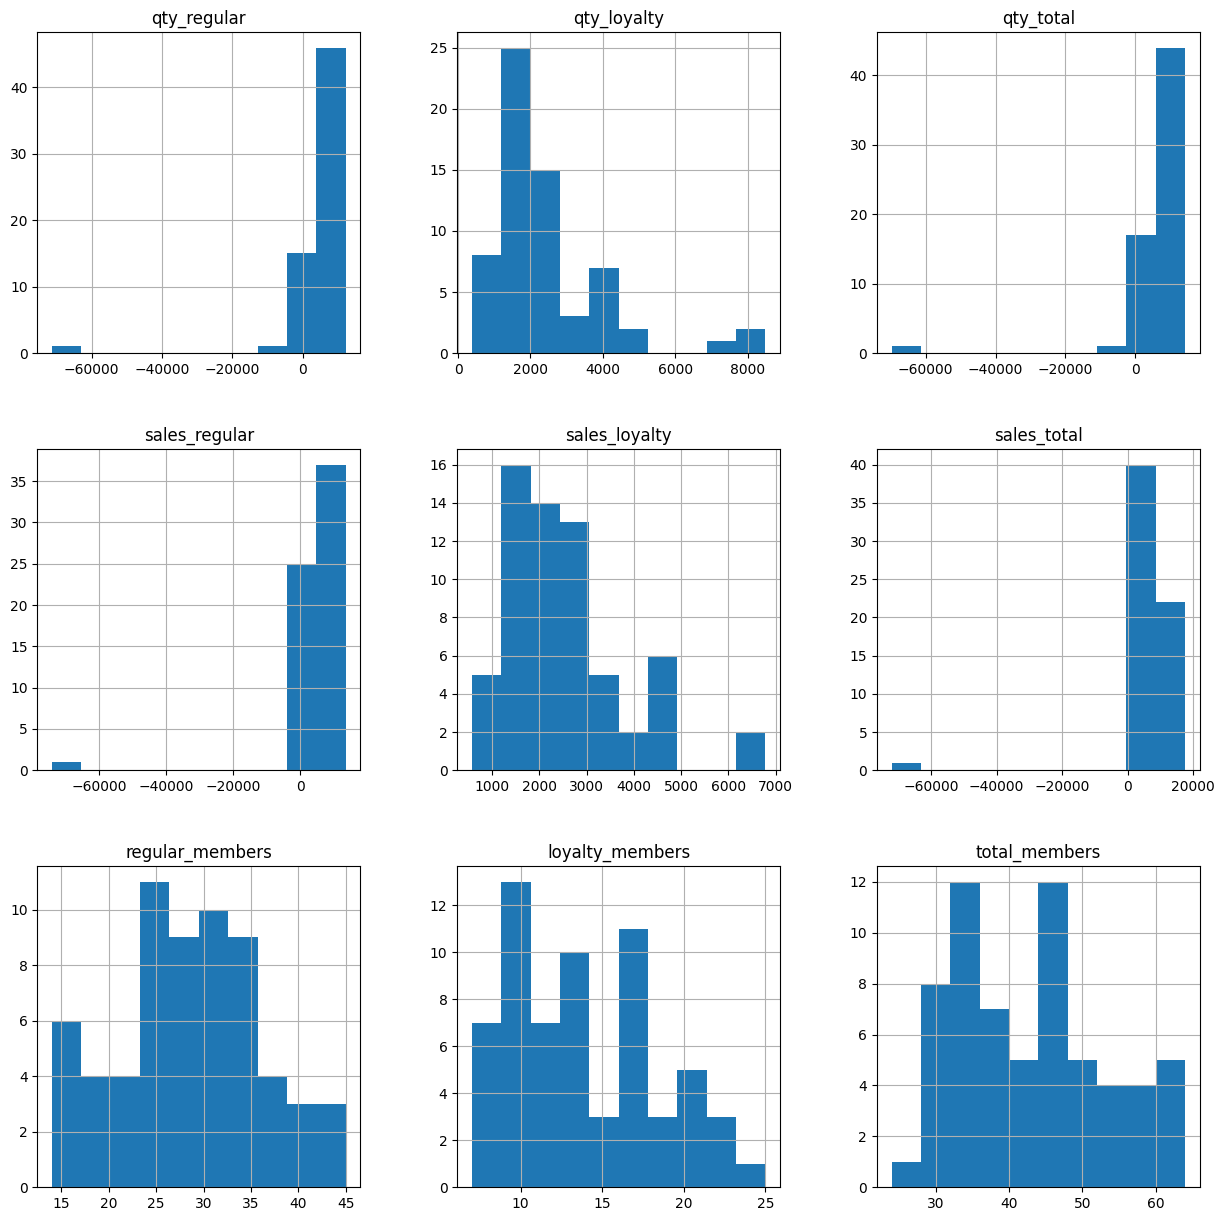

In [80]:
# Membuat irisan data gerai dengan kinerja tinggi
low = data[data['shopid'].isin(under_avg_list)]

# Grafik histogram
low.hist(figsize=(15,15))

**Karakteristik dari gerai yang berkinerja rendah :**
1. qty_regular, kebanyakan volume penjualan ke anggota reguler pada rentang 1-10.000 per bulan. Terdapat volume penjualan negatif yang disebabkan pembatalan penjualan.
2. qty_loyalty, kebanyakan volume penjualan ke anggota loyalitas pada rentang 1000-2500 per bulan.
3. qty_total, kebanyakan total volume penjualan pada rentang 1-10.000 per bulan. Terdapat volume penjualan negatif yang disebabkan pembatalan penjualan.
4. sales_regular, kebanyakan penjualan ke anggota reguler pada rentang 1-10.000 per bulan. Terdapat penjualan negatif yang disebabkan pembatalan penjualan.
5. sales_loyalty, kebanyakan penjualan ke anggota loyalitas pada rentang 1-3000 per bulan.
6. sales_total, kebanyakan total penjualan  pada rentang 1-15.000 per bulan.
7. regular_members, kebanyakan jumlah anggota reguler yang melakukan transaksi pada rentang 25-35 anggota per bulan.
8. loyalty_members, kebanyakan jumlah anggota loyalitas yang melakukan transaksi para dentang 10-14 anggota per bulan.
9. total_members, kebanyakan total jumlah anggota yang melakukan transaksi pada rentang 30-40 anggota per bulan.

## Kesimpulan

**Korelasi fitur terhadap total penjualan (sales_total) :**
1. qty_regular (0,97), volume penjualan ke anggota reguler memiliki korelasi positif sangat kuat terhadap total penjualan.
2. qty_loyalty (0,25), volume penjualan ke anggota loyalitas memiliki korelasi positif sedang terhadap total penjualan.
3. qty_total (0,98), total volume penjualan memiliki korelasi positif sangat kuat terhadap total penjualan.
4. sales_regular (0,98), penjualan ke anggota reguler memiliki korelasi positif sangat kuat terhadap total penjualan.
5. sales_loyalty (0,27), penjualan ke anggota loyalitas memiliki korelasi positif sedang terhadap total penjualan.
6. regular_members (0,38), jumlah anggota reguler yang melakukan transaksi memiliki korelasi positif sedang terhadap total penjualan.
7. loyalty_members (0,10), jumlah anggota loyaliyas yang melakukan transaksi memiliki korelasi lemah terhadap total penjualan.
8. total_members (0,38), total jumlah anggota yang melakukan transaksi memiliki korelasi positif sedang terhadap total penjualan.

**Karakteristik dari gerai yang berkinerja tinggi :**
1. qty_regular, kebanyakan volume penjualan ke anggota reguler pada rentang 1-200.000 per bulan.
2. qty_loyalty, kebanyakan volume penjualan ke anggota loyalitas pada rentang 1-2600 per bulan.
3. qty_total, kebanyakan total volume penjualan pada rentang 1-200.000 per bulan.
4. sales_regular, kebanyakan penjualan ke anggota reguler pada rentang 1-200.000 per bulan.
5. sales_loyalty, kebanyakan penjualan ke anggota loyalitas pada rentang 1-4000 per bulan.
6. sales_total, kebanyakan total penjualan  pada rentang 1-200.000 per bulan.
7. regular_members, kebanyakan jumlah anggota reguler yang melakukan transaksi pada rentang 1-50 anggota per bulan.
8. loyalty_members, kebanyakan jumlah anggota loyalitas yang melakukan transaksi para dentang 1-15 anggota per bulan.
9. total_members, kebanyakan total jumlah anggota yang melakukan transaksi pada rentang 1-50 anggota per bulan.


**Karakteristik dari gerai yang berkinerja rendah :**
1. qty_regular, kebanyakan volume penjualan ke anggota reguler pada rentang 1-10.000 per bulan. Terdapat volume penjualan negatif yang disebabkan pembatalan penjualan.
2. qty_loyalty, kebanyakan volume penjualan ke anggota loyalitas pada rentang 1000-2500 per bulan.
3. qty_total, kebanyakan total volume penjualan pada rentang 1-10.000 per bulan. Terdapat volume penjualan negatif yang disebabkan pembatalan penjualan.
4. sales_regular, kebanyakan penjualan ke anggota reguler pada rentang 1-10.000 per bulan. Terdapat penjualan negatif yang disebabkan pembatalan penjualan.
5. sales_loyalty, kebanyakan penjualan ke anggota loyalitas pada rentang 1-3000 per bulan.
6. sales_total, kebanyakan total penjualan  pada rentang 1-15.000 per bulan.
7. regular_members, kebanyakan jumlah anggota reguler yang melakukan transaksi pada rentang 25-35 anggota per bulan.
8. loyalty_members, kebanyakan jumlah anggota loyalitas yang melakukan transaksi para dentang 10-14 anggota per bulan.
9. total_members, kebanyakan total jumlah anggota yang melakukan transaksi pada rentang 30-40 anggota per bulan.

# Pengujian Hipotesis

In [81]:
# Fungsi uji hipotesis
def hypothesis(file1, file2) :
    alpha = 0.05
    results = st.ttest_ind(file1, file2, equal_var=False)
    print('p-value:', results.pvalue)
    if results.pvalue < alpha :
        print('hipotesis nol ditolak')
    else :
        print('hipotesis nol tidak dapat ditolak')
    

Membuat fungsi untuk menguji hipotesis karena akan digunakan berulang.

**1. Gerai dengan kinerja tinggi memiliki total penjualan bulanan yang lebih tinggi.**

H0 = Gerai berkinerja tinggi memiliki total penjualan yang sama dengan gerai berkinerja rendah.

Ha = Gerai berkinerja tinggi memiliki total penjualan lebih tinggi dari gerai berkinerja rendah.

In [82]:
hypothesis(high['sales_total'], low['sales_total'])

p-value: 0.003708003318820271
hipotesis nol ditolak


Gerai berkinerja tinggi memiliki total penjualan lebih tinggi dari gerai berkinerja rendah. (p-value: 0,004)

**2. Gerai dengan kinerja tinggi memiliki total volume penjualan bulanan yang lebih tinggi.**

H0 = Gerai berkinerja tinggi memiliki total volume penjualan yang sama dengan gerai berkinerja rendah.

Ha = Gerai berkinerja tinggi memiliki total volume penjualan lebih tinggi dari gerai berkinerja rendah.

In [83]:
hypothesis(high['qty_total'], low['qty_total'])

p-value: 0.013491866273353801
hipotesis nol ditolak


Gerai berkinerja tinggi memiliki total volume penjualan lebih tinggi dari gerai berkinerja rendah. (p-value: 0,013)

**3. Gerai dengan kinerja tinggi memiliki jumlah total anggota yang melakukan transaksi bulanan lebih tinggi.**

H0 = Gerai berkinerja tinggi memiliki jumlah total anggota yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah.

Ha = Gerai berkinerja tinggi memiliki jumlah total anggota yang melakukan transaksi bulanan lebih tinggi dari gerai berkinerja rendah.

In [84]:
hypothesis(high['total_members'], low['total_members'])

p-value: 0.08641608536774524
hipotesis nol tidak dapat ditolak


Gerai berkinerja tinggi memiliki jumlah total anggota yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah. (p-value: 0,086)

**4. Gerai dengan kinerja tinggi memiliki jumlah anggota reguler yang melakukan transaksi bulanan lebih tinggi.**

H0 = Gerai berkinerja tinggi memiliki jumlah anggota reguler yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah.

Ha = Gerai berkinerja tinggi memiliki jumlah anggota reguler yang melakukan transaksi bulanan lebih tinggi dari gerai berkinerja rendah.

In [85]:
hypothesis(high['regular_members'], low['regular_members'])

p-value: 0.089046689935092
hipotesis nol tidak dapat ditolak


Gerai berkinerja tinggi memiliki jumlah anggota reguler yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah. (p-value: 0,089)

**5. Gerai dengan kinerja tinggi memiliki jumlah anggota loyalitas yang melakukan transaksi bulanan lebih tinggi.**

H0 = Gerai berkinerja tinggi memiliki jumlah anggota loyalitas yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah.

Ha = Gerai berkinerja tinggi memiliki jumlah anggota loyalitas yang melakukan transaksi bulanan lebih tinggi dari gerai berkinerja rendah.

In [86]:
hypothesis(high['loyalty_members'], low['loyalty_members'])

p-value: 0.740954707197581
hipotesis nol tidak dapat ditolak


Gerai berkinerja tinggi memiliki jumlah anggota loyalitas yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah. (p-value: 0,74)

# Kesimpulan

Periode dataset dimulai dari tanggal 2016-12-01 sampai 2017-02-28.

Terdapat 2 dataset dalam penelitian ini :

1. **product_codes**, dataset berisi informasi mengenai harga produk.
2. **retail_dataset**, dataset berisi informasi mengenai transaksi volume penjualan harian tiap gerai.

Informasi dan perbaikan yang dilakukan pada setiap dataset :

1. **product_codes**
   
   A. **Informasi yang terdapat pada dataset :**

   Jumlah baris dan kolom  (3159, 2)

   Tidak terdapat duplikat eksplisit dan nilai yang hilang dalam data.

   Terdapat sebanyak 382 produk dengan harga 0 yang merupakan bundle. Produk ini diberikan gratis kepada pelanggan.

   Informasi yang terdapat pada kolomnya :

    - `productid`, nomor id produk.
    - `price_per_one`, harga produk per pcs.
    
    B. **Perbaikan pada dataset :**
    
     1. Merubah nama kolom menjadi lowercase.
 


2. **retail_dataset**

   A. **Informasi yang terdapat pada dataset :**

   Jumlah baris dan kolom  (105335, 7)

   Terdapat 2.118 baris data dengan qty penjualan negatif. 2,01% dari total baris data. Dengan total qty penjualan negatif -119.662 pcs.

   Transaksi ini merupakan pembatalan penjualan yang tidak dilakukan didalam satu nomor `purchaseid` sehingga menghasilkan qty negatif.

   Selain hal tersebut terdapat 31 gerai, 4.894 nomor transaksi dan 3.159 jenis produk terjual.

   Informasi yang terdapat pada kolomnya :

   - `purchaseId`, nomor id transaksi penjualan.
   - `item_id`, nomor id produk.
   - `purchasedate`, tanggal transaksi.
   - `quantity`, jumlah barang.
   - `customerid`, nomor id pelanggan.
   - `shopid`, nomor id gerai.
   - `loyalty_program`, apakah pelanggan adalah anggota program loyalitas. 0 = tidak, 1 = ya. 
   
   B. **Perbaikan pada dataset :**
    
    1. Merubah nama kolom menjadi lowercase.
    2. Merubah kolom `purchasedate` menjadi datetime.
    3. Menghapus duplikat eksplisit.
    4. Mengisi nilai yang hilang pada kolom `customerid` dengan nomor `purchaseid`.
    5. Menghapus transaksi penjualan dengan nilai quantity 0.

**Kinerja penjualan secara keseluruhan :**

1. Penjualan mengalami penurunan dari periode Desember 2016 sampai Februari 2017.
2. Volume penjualan mengalami penurunan dari periode Desember 2106 sampai Februari 2017.
3. Rata-rata penjualan per gerai mengalami penurunan dari periode Desember 2016 sampai Februari 2017.
4. Rata-rata volume penjualan per gerai mengalami penurunan dari periode Desember 2016 sampai Februari 2017.

**Jumlah anggota yang melakukan transaksi secara keseluruhan :**

1. Jumlah anggota secara keseluruhan yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 terus menurun.
2. Jumlah anggota reguler yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 terus menurun.
3. Jumlah anggota loyalitas yang melakukan transaksi pada periode Desember 2016 sampai Februari 2017 menurun. Terdapat sedikit peningkatan di bulan Februari 2017.


**Penjualan Bulanan Gerai :**
Sebagian besar gerai mengalami penurunan penjualan pada periode Desember 2016 sampai Februari 2017. Terdapat lonjakan penjualan yang tinggi pada 'Shop 15' di bulan Januari 2017 dan terdapat penurunan penjualan yang tajam pada 'Shop 21' di bulan Januari 2017 yang disebabkan pembatalan penjualan. 

**Volume Penjualan Bulanan Gerai :**
Sebagian besar gerai mengalami penurunan volume penjualan pada periode Desember 2016 sampai Februari 2017. Terdapat lonjakan volume penjualan yang tinggi pada 'Shop 15' di bulan Januari 2017. Terdapat penurunan volume penjualan yang tajam pada 'Shop 16' di bulan Desember 2016 dan 'Shop 21' di bulan Januari 2017 yang disebabkan besarnya volume pembatalan penjualan.

**Total Anggota yang Melakukan Transaksi Tiap Gerai :**
Sebagian besar jumlah anggota yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

**Anggota Reguler yang Melakukan Transaksi Tiap Gerai :**
Sebagian besar jumlah anggota reguler yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

**Anggota Loyalitas yang Melakukan Transaksi Tiap Gerai :**
Sebagian besar jumlah anggota loyalitas yang melakukan transaksi di tiap gerai mengalami penurunan pada periode Desember 2016 sampai Februari 2017.

**Rata-rata Penjualan Bulanan Gerai :**
'Shop 15' menduduki peringkat pertama dengan rata-rata penjualan bulanan tertinggi, yang disebabkan lonjakan penjualan pada bulan Januari 2017.
'Shop 21' menduduki peringkat terakhir dengan rata-rata penjualan bulanan terendah, yang disebabkan pembatalan penjualan yang besar pada bulan Januari 2017 sehingga menyebabkan nilai rata-rata penjualan negatif

**Rata-rata Volume Penjualan Bulanan Gerai:**
'Shop 15' menduduki peringkat pertama dengan rata-rata volume penjualan bulanan tertinggi, yang disebabkan lonjakan volume penjualan pada bulan Januari 2017.
'Shop 21' menduduki peringkat terakhir dengan rata-rata volume penjualan bulanan terendah, yang disebabkan pembatalan penjualan yang besar pada bulan Januari 2017 sehingga menyebabkan nilai rata-rata volume penjualan negatif.

**Rata-rata Total Anggota yang Melakukan Transaksi Tiap Gerai :**
'Shop 0' menduduki peringkat pertama dengan rata-rata jumlah anggota yang melakukan transaksi perbulan tertinggi dan 'Shop 3' menduduki peringkat terakhir.

**Rata-rata Total Anggota Reguler yang Melakukan Transaksi Tiap Gerai :**
'Shop 0' menduduki peringkat pertama dengan rata-rata jumlah anggota reguler yang melakukan transaksi perbulan tertinggi dan 'Shop 3' menduduki peringkat terakhir.

**Rata-rata Total Anggota Loyalitas yang Melakukan Transaksi Tiap Gerai :**
Terdapat 3 gerai dengan rata-rata jumlah anggota loyalitas yang melakukan transaksi perbulan tertinggi, 'Shop 7', 'Shop 13' dan 'Shop 26'.
Terdapat 2 gerai dengan rata-rata jumlah anggota loyalitas yang melakukan transaksi perbulan terendah, 'Shop 6' dan 'Shop 28'.



**Menentukan Parameter Kinerja Utama Gerai**

Pada penelitian ini nilai penjualan merupakan parameter utama kinerja gerai dan terdapat 21 gerai dengan nilai penjualan dibawah rata-rata serta 20 gerai dengan volume penjualan dibawah rata-rata.

**Analisis Data Eksploratif**

**Korelasi fitur terhadap total penjualan (sales_total) :**
1. qty_regular (0,97), volume penjualan ke anggota reguler memiliki korelasi positif sangat kuat terhadap total penjualan.
2. qty_loyalty (0,25), volume penjualan ke anggota loyalitas memiliki korelasi positif sedang terhadap total penjualan.
3. qty_total (0,98), total volume penjualan memiliki korelasi positif sangat kuat terhadap total penjualan.
4. sales_regular (0,98), penjualan ke anggota reguler memiliki korelasi positif sangat kuat terhadap total penjualan.
5. sales_loyalty (0,27), penjualan ke anggota loyalitas memiliki korelasi positif sedang terhadap total penjualan.
6. regular_members (0,38), jumlah anggota reguler yang melakukan transaksi memiliki korelasi positif sedang terhadap total penjualan.
7. loyalty_members (0,10), jumlah anggota loyaliyas yang melakukan transaksi memiliki korelasi lemah terhadap total penjualan.
8. total_members (0,38), total jumlah anggota yang melakukan transaksi memiliki korelasi positif sedang terhadap total penjualan.

**Karakteristik dari gerai yang berkinerja tinggi :**
1. qty_regular, kebanyakan volume penjualan ke anggota reguler pada rentang 1-200.000 per bulan.
2. qty_loyalty, kebanyakan volume penjualan ke anggota loyalitas pada rentang 1-2600 per bulan.
3. qty_total, kebanyakan total volume penjualan pada rentang 1-200.000 per bulan.
4. sales_regular, kebanyakan penjualan ke anggota reguler pada rentang 1-200.000 per bulan.
5. sales_loyalty, kebanyakan penjualan ke anggota loyalitas pada rentang 1-4000 per bulan.
6. sales_total, kebanyakan total penjualan  pada rentang 1-200.000 per bulan.
7. regular_members, kebanyakan jumlah anggota reguler yang melakukan transaksi pada rentang 1-50 anggota per bulan.
8. loyalty_members, kebanyakan jumlah anggota loyalitas yang melakukan transaksi para dentang 1-15 anggota per bulan.
9. total_members, kebanyakan total jumlah anggota yang melakukan transaksi pada rentang 1-50 anggota per bulan.


**Karakteristik dari gerai yang berkinerja rendah :**
1. qty_regular, kebanyakan volume penjualan ke anggota reguler pada rentang 1-10.000 per bulan. Terdapat volume penjualan negatif yang disebabkan pembatalan penjualan.
2. qty_loyalty, kebanyakan volume penjualan ke anggota loyalitas pada rentang 1000-2500 per bulan.
3. qty_total, kebanyakan total volume penjualan pada rentang 1-10.000 per bulan. Terdapat volume penjualan negatif yang disebabkan pembatalan penjualan.
4. sales_regular, kebanyakan penjualan ke anggota reguler pada rentang 1-10.000 per bulan. Terdapat penjualan negatif yang disebabkan pembatalan penjualan.
5. sales_loyalty, kebanyakan penjualan ke anggota loyalitas pada rentang 1-3000 per bulan.
6. sales_total, kebanyakan total penjualan  pada rentang 1-15.000 per bulan.
7. regular_members, kebanyakan jumlah anggota reguler yang melakukan transaksi pada rentang 25-35 anggota per bulan.
8. loyalty_members, kebanyakan jumlah anggota loyalitas yang melakukan transaksi para dentang 10-14 anggota per bulan.
9. total_members, kebanyakan total jumlah anggota yang melakukan transaksi pada rentang 30-40 anggota per bulan.

**Pengujian Hipotesis :**

1. Gerai berkinerja tinggi memiliki total penjualan lebih tinggi dari gerai berkinerja rendah. (p-value: 0,004)
2. Gerai berkinerja tinggi memiliki total volume penjualan lebih tinggi dari gerai berkinerja rendah. (p-value: 0,013)
3. Gerai berkinerja tinggi memiliki jumlah total anggota yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah. (p-value: 0,086)
4. Gerai berkinerja tinggi memiliki jumlah anggota reguler yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah. (p-value: 0,089)
5. Gerai berkinerja tinggi memiliki jumlah anggota loyalitas yang melakukan transaksi bulanan sama dengan gerai berkinerja rendah. (p-value: 0,74)

Hal ini menunjukkan bahwa toko-toko yang berkinerja tinggi umumnya memiliki total penjualan dan volume penjualan yang lebih tinggi dibandingkan dengan toko-toko yang berkinerja rendah dan tidak ada perbedaan yang signifikan secara statistik dalam jumlah total anggota atau kategori anggota tertentu yang melakukan transaksi bulanan antara toko-toko yang berkinerja tinggi dan toko berkinerja rendah.

**Kesimpulan umum :** 

Analisis menunjukkan bahwa terdapat penurunan dalam penjualan dan aktivitas anggota dari bulan Desember 2016 hingga Februari 2017. Toko dengan kinerja tinggi cenderung memiliki penjualan dan aktivitas anggota yang lebih tinggi dibandingkan dengan toko dengan kinerja rendah, namun perbedaan dalam aktivitas keanggotaan tidak signifikan secara statistik.

Berdasarkan https://www.weather.gov/cle/Climate_Snowfall_2016-17 pada periode ini Amerika Serikat sedang mengalami musim dingin. 

Menurut https://www.constructconnect.com/blog/seasonal-temperature-changes-affect-construction-industry, Iklim adalah faktor terbesar dan terpenting dalam konstruksi; itulah yang menentukan bahan yang digunakan, jangka waktu konstruksi, serta ketahanan dan umur panjang bangunan yang dibangun.

Musim gugur dan musim dingin adalah periode klasik untuk lokasi konstruksi berbahaya, tanah licin dan basah. Cuaca dingin mengharuskan pekerja untuk berpakaian hangat hal ini menyebabkan berkurangnya mobilitas dan lebih banyak kecelakaan. Listrik dan air cenderung memiliki lebih banyak peluang untuk berbaur, itulah sebabnya lokasi konstruksi di musim dingin akan menjadi jebakan maut jika tidak dikelola dengan baik.

Kemungkinan penurunan penjualan dan aktivitas anggota disebabkan oleh faktor musim karena sebagian besar gerai mengalami penurunan di periode ini.

**Saran :**

1. Menyarankan kepada retailer menyesuaikan kampanye pemasaran untuk memenuhi kebutuhan pelanggan selama musim dingin. Mempromosikan produk dan layanan yang sesuai untuk cuaca dingin.
2. Menyesuaikan kampanye pemasaran dan jenis produk yang cocok untuk setiap musim.
3. Perlu dilakukan analisa lebih lanjut dengan periode yang lebih panjang untuk melihat pengaruh musim terhadap penjualan, aktivitas anggota dan kinerja gerai.

Link presentasi : https://drive.google.com/file/d/11oOVCRZ8dNbsctLtNwoZOYyRgwWHCoiC/view?usp=sharing